# <h1> <b> <i> Visualisation des graphes demandés

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1> Dataset2

In [19]:
data2 = pd.read_csv("./Data/Dataset2_final.csv")

<i> La distribution du nombre total des cas confirmés et tests positifs par zones

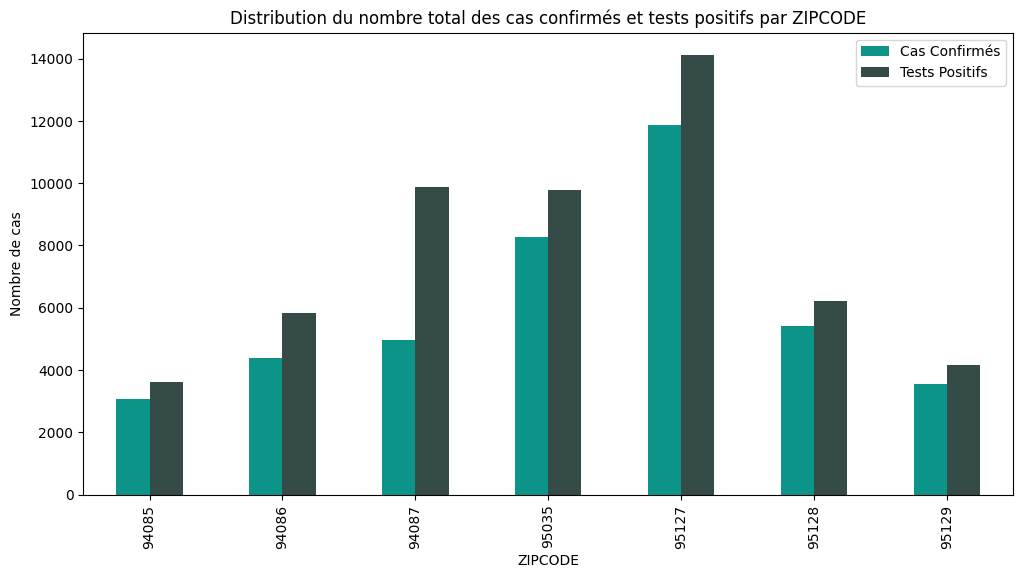

In [20]:
custom_colors = ['#0d9488', '#344B48','#B87436']
data_grouped = data2.groupby('zcta')[['case count', 'positive tests']].sum()
data_grouped.plot(kind='bar', figsize=(12, 6), color=custom_colors)
plt.title('Distribution du nombre total des cas confirmés et tests positifs par ZIPCODE')
plt.xlabel('ZIPCODE')
plt.ylabel('Nombre de cas')
plt.legend(["Cas Confirmés", "Tests Positifs"])
plt.show()


<i> Comment les tests COVID-19, les tests positifs et le nombre de cas évolue au fil du temps (hebdomadaire, mensuel et annuel) pour une zone choisit 

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\3997088733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])


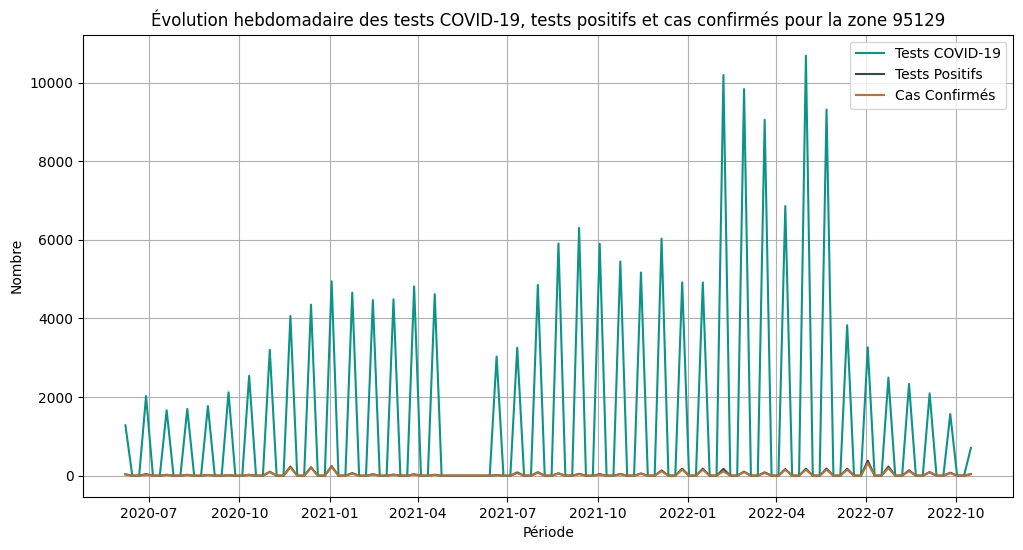

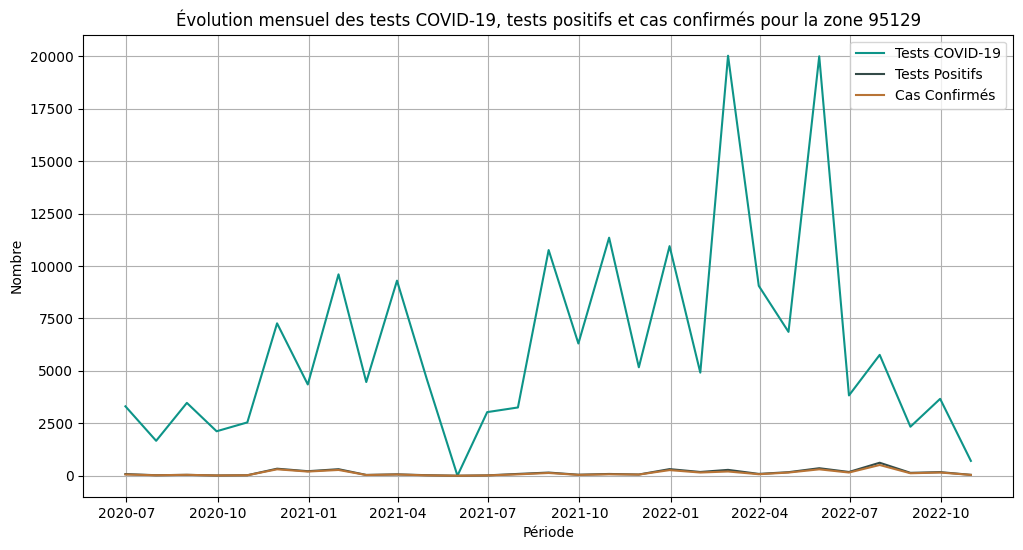

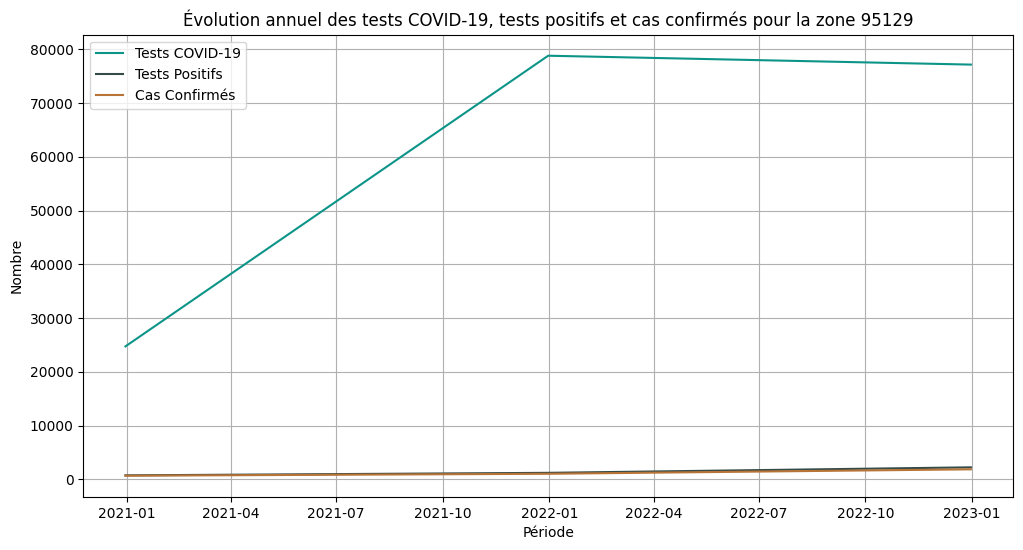

In [21]:
zone_data = data2[data2['zcta'] == 95129]
zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])
zone_data_weekly = zone_data.set_index('Start date').resample('W').sum()
plt.figure(figsize=(12, 6))
plt.plot(zone_data_weekly.index, zone_data_weekly['test count'], label='Tests COVID-19', color=custom_colors[0])
plt.plot(zone_data_weekly.index, zone_data_weekly['positive tests'], label='Tests Positifs', color=custom_colors[1])
plt.plot(zone_data_weekly.index, zone_data_weekly['case count'], label='Cas Confirmés', color=custom_colors[2])
plt.title(f'Évolution hebdomadaire des tests COVID-19, tests positifs et cas confirmés pour la zone 95129')
plt.xlabel('Période')
plt.ylabel('Nombre')
plt.legend()
plt.grid(True)
plt.show()
zone_data_monthly = zone_data.set_index('Start date').resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(zone_data_monthly.index, zone_data_monthly['test count'], label='Tests COVID-19', color=custom_colors[0])
plt.plot(zone_data_monthly.index, zone_data_monthly['positive tests'], label='Tests Positifs', color=custom_colors[1])
plt.plot(zone_data_monthly.index, zone_data_monthly['case count'], label='Cas Confirmés', color=custom_colors[2])
plt.title(f'Évolution mensuel des tests COVID-19, tests positifs et cas confirmés pour la zone 95129')
plt.xlabel('Période')
plt.ylabel('Nombre')
plt.legend()
plt.grid(True)
plt.show()
zone_data_yearly = zone_data.set_index('Start date').resample('Y').sum()
plt.figure(figsize=(12, 6))
plt.plot(zone_data_yearly.index, zone_data_yearly['test count'], label='Tests COVID-19', color=custom_colors[0])
plt.plot(zone_data_yearly.index, zone_data_yearly['positive tests'], label='Tests Positifs', color=custom_colors[1])
plt.plot(zone_data_yearly.index, zone_data_yearly['case count'], label='Cas Confirmés', color=custom_colors[2])
plt.title(f'Évolution annuel des tests COVID-19, tests positifs et cas confirmés pour la zone 95129')
plt.xlabel('Période')
plt.ylabel('Nombre')
plt.legend()
plt.grid(True)
plt.show()

<i> Comment les cas covid positifs sont distribués par zone et par année

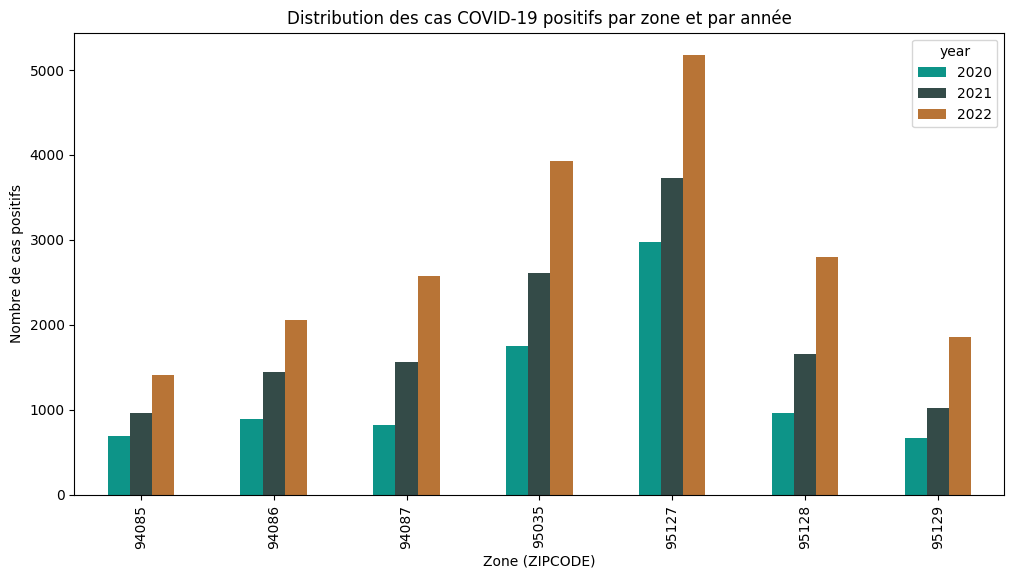

In [22]:
data2['Start date'] = pd.to_datetime(data2['Start date'])
data2['year'] = data2['Start date'].dt.year
grouped_data2 = data2.groupby(['zcta', 'year'])['case count'].sum().unstack()
grouped_data2.plot(kind='bar', figsize=(12, 6), color=custom_colors)
plt.title('Distribution des cas COVID-19 positifs par zone et par année')
plt.xlabel('Zone (ZIPCODE)')
plt.ylabel('Nombre de cas positifs')
plt.show()

<i> le rapport entre la population et le nombre de tests effectués

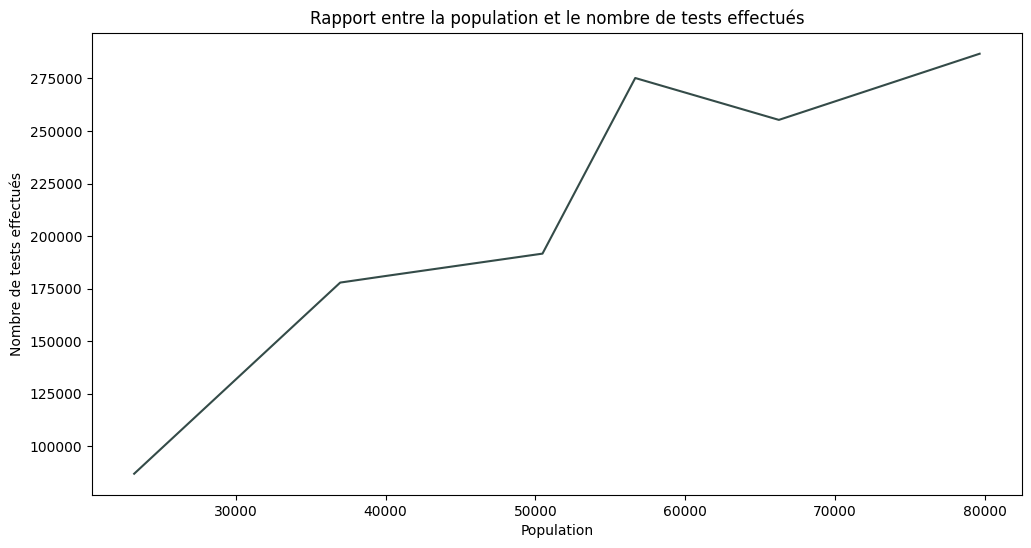

In [23]:
grouped_data = data2.groupby(['population'])['test count'].sum()
grouped_data.plot(kind= 'line', figsize=(12, 6), color=custom_colors[1])
plt.title('Rapport entre la population et le nombre de tests effectués')
plt.xlabel('Population')
plt.ylabel('Nombre de tests effectués')

plt.show()

<i> Quelles sont les 5 zones les plus fortement impactées par le coronavirus 

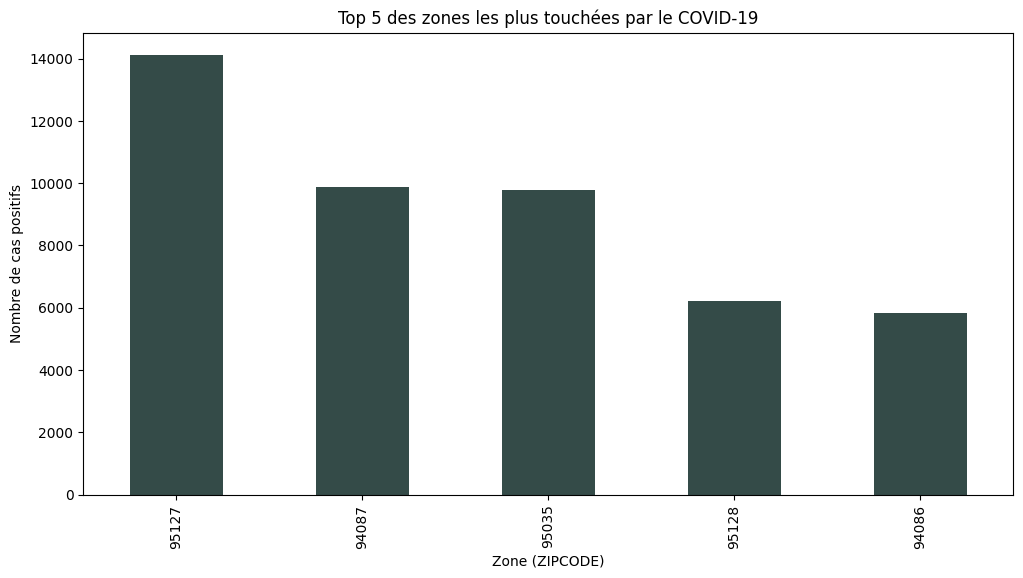

In [24]:
grouped_data = data2.groupby('zcta')['positive tests'].sum()
top_5_zones = grouped_data.sort_values(ascending=False).head(5)
top_5_zones.plot(kind='bar', figsize=(12, 6), color=custom_colors[1])
plt.title('Top 5 des zones les plus touchées par le COVID-19')
plt.xlabel('Zone (ZIPCODE)')
plt.ylabel('Nombre de cas positifs')
plt.show()

<i> Quel est le rapport entre les cas confirmés, les tests effectués et les tests positifs pour chaque zone

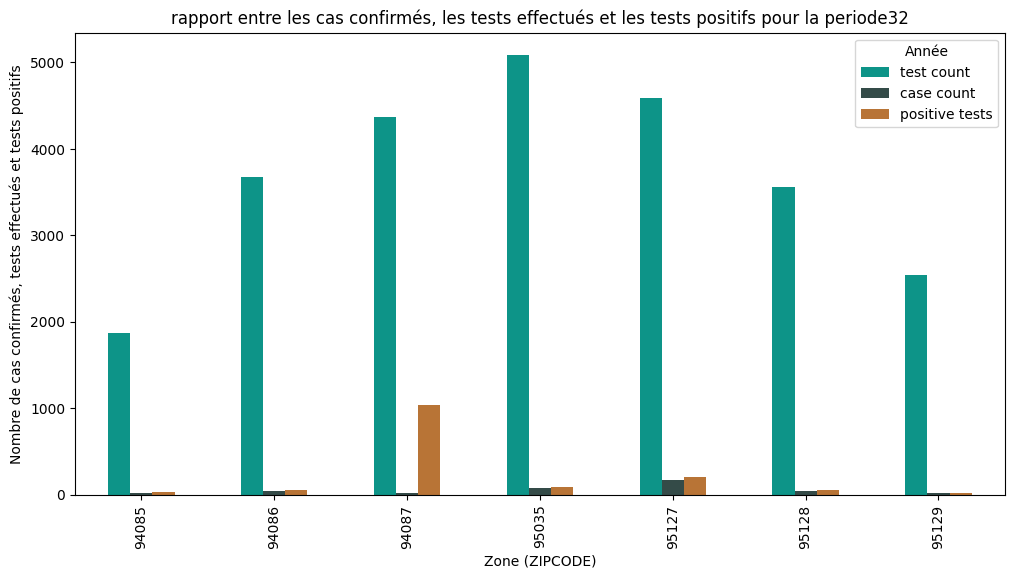

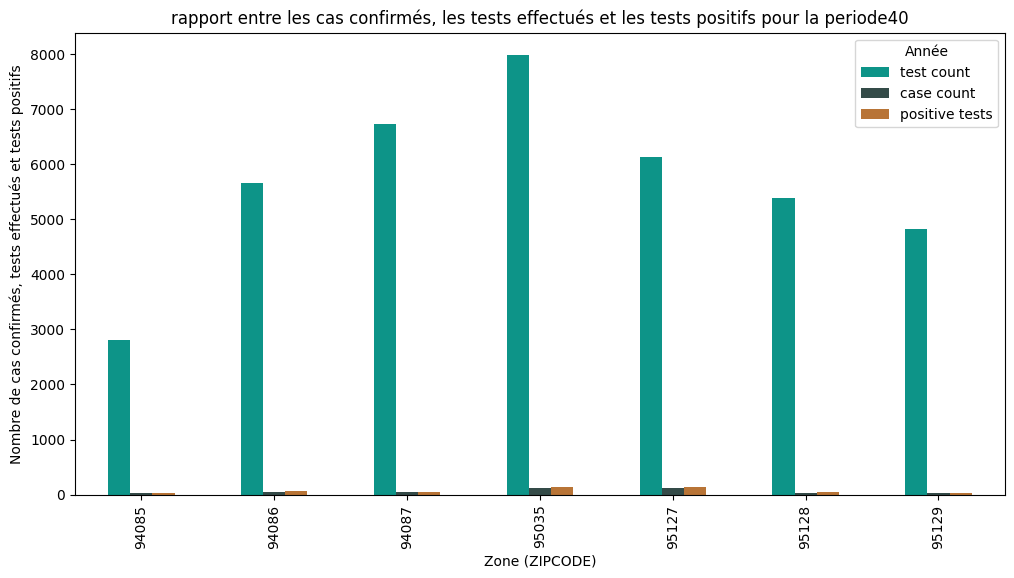

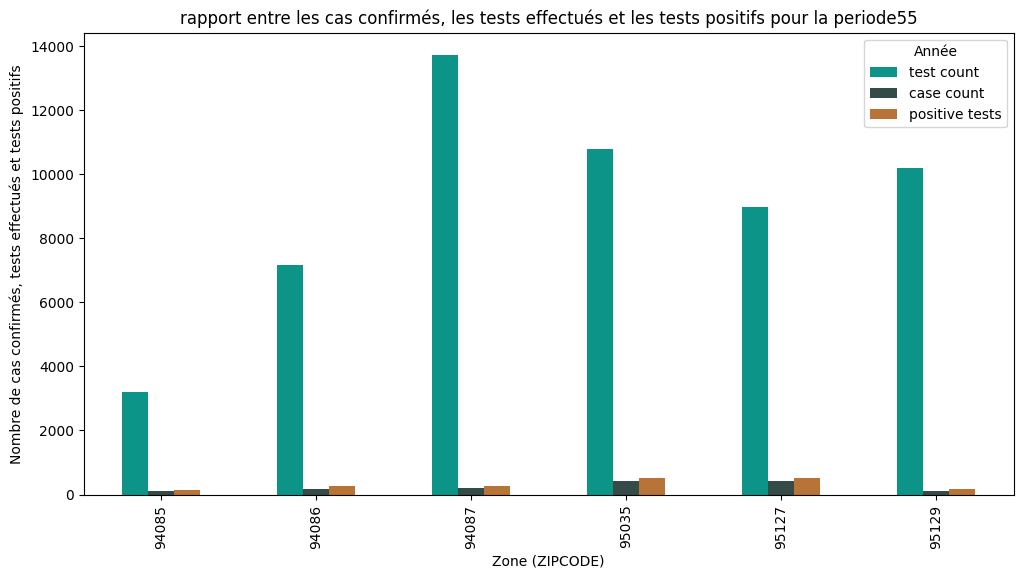

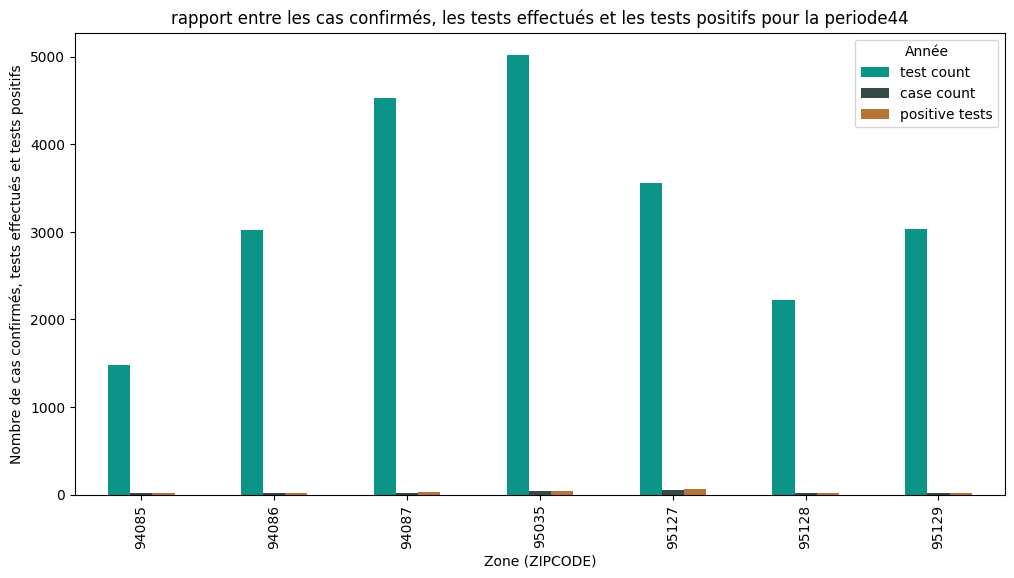

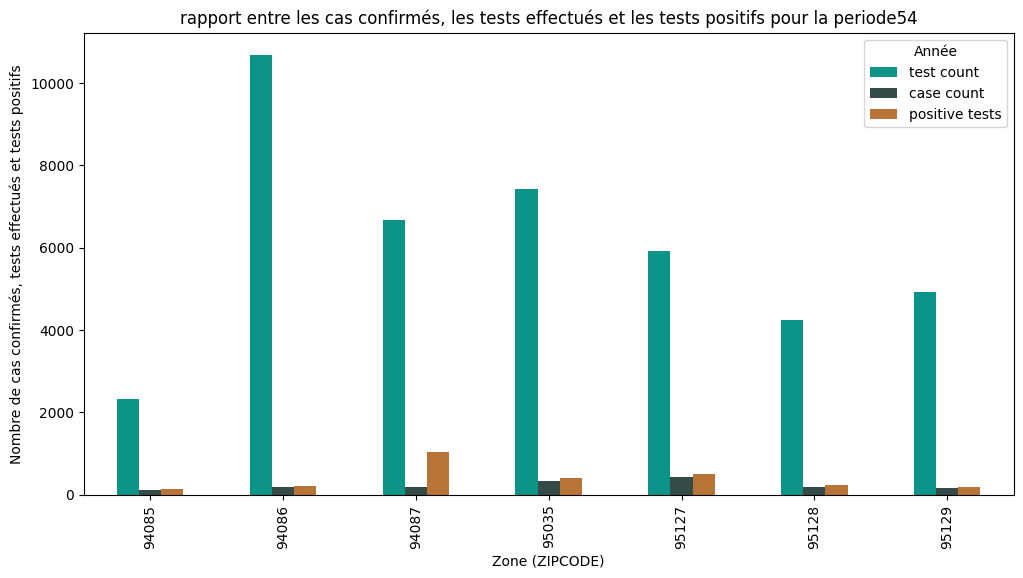

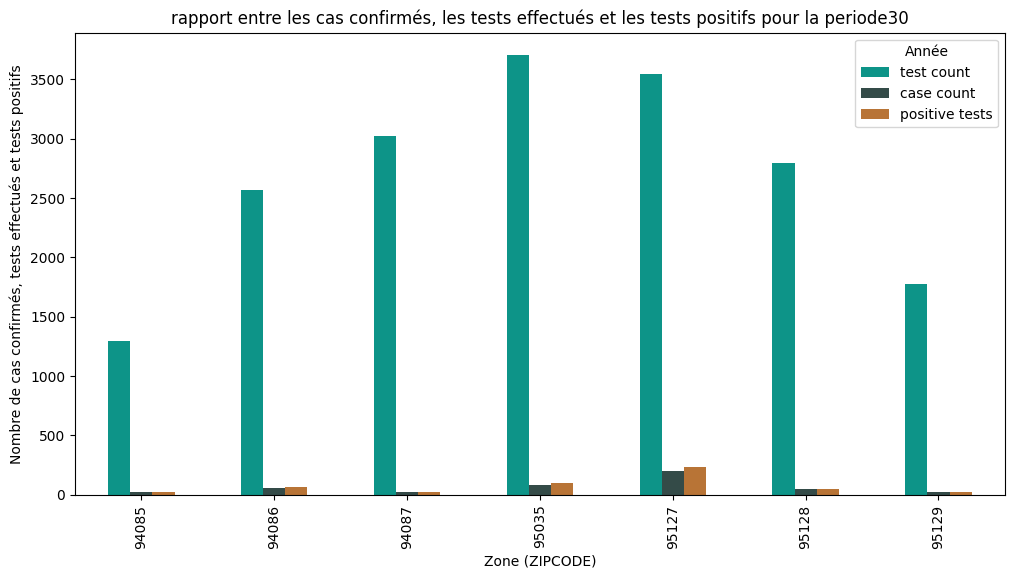

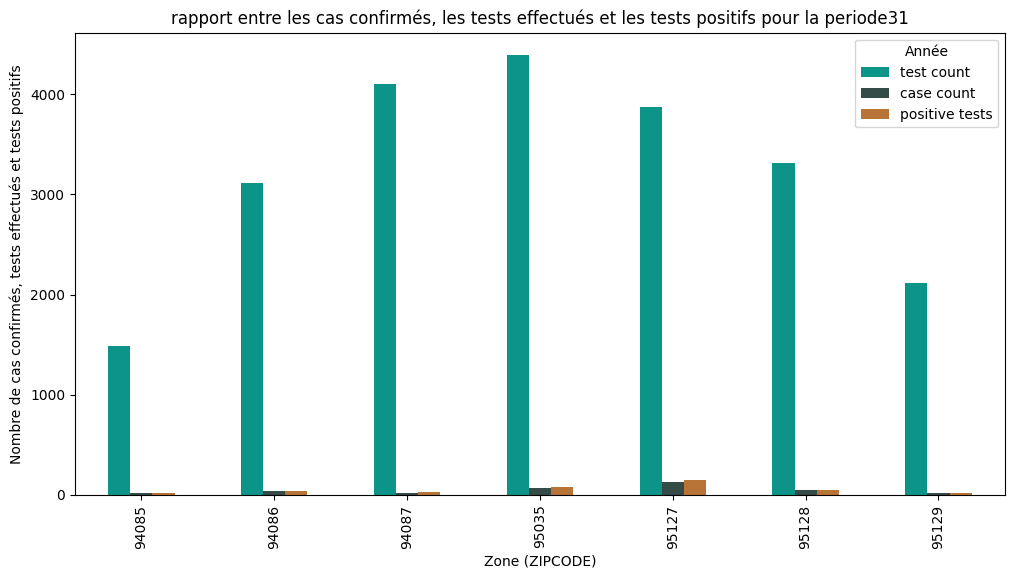

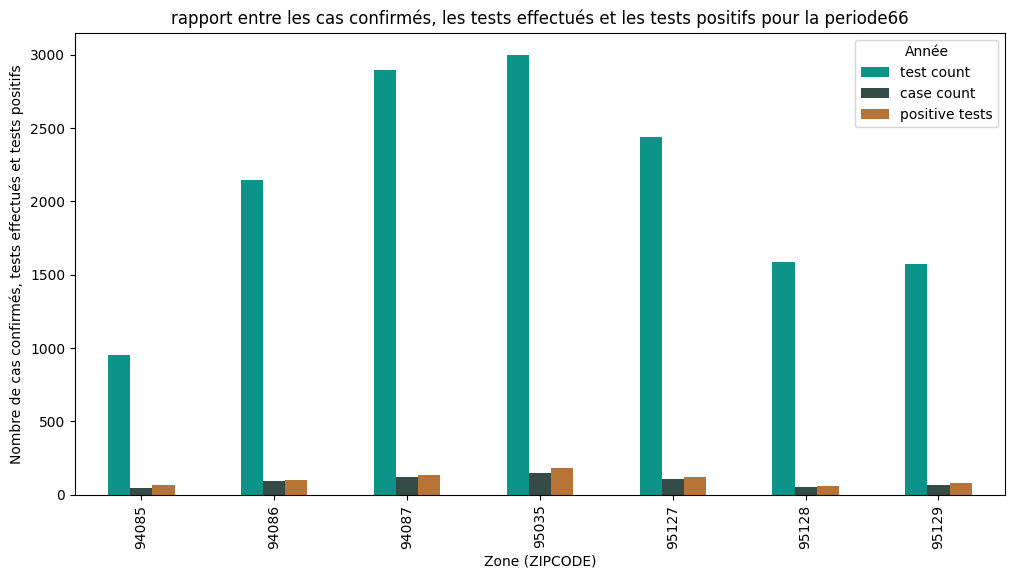

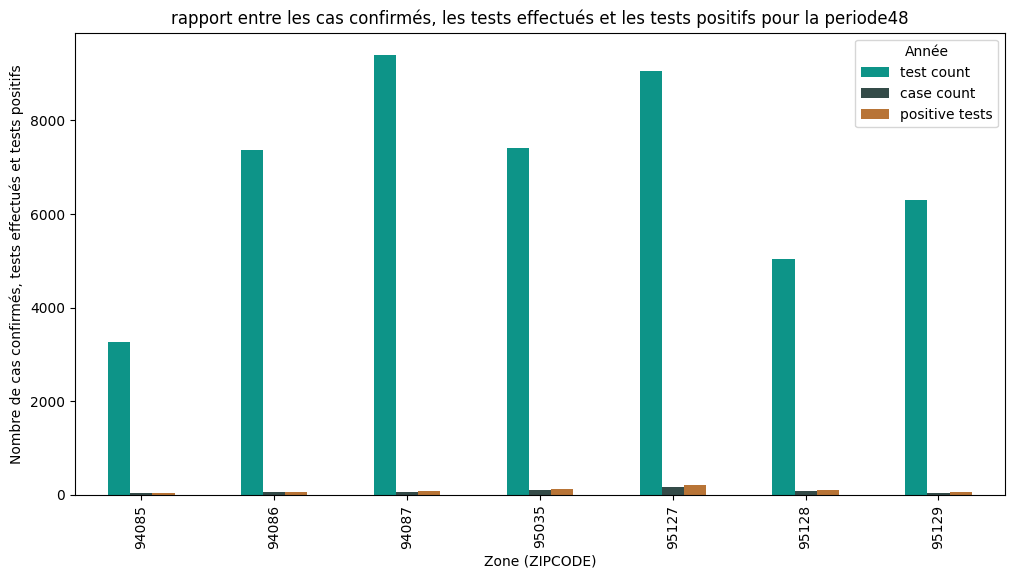

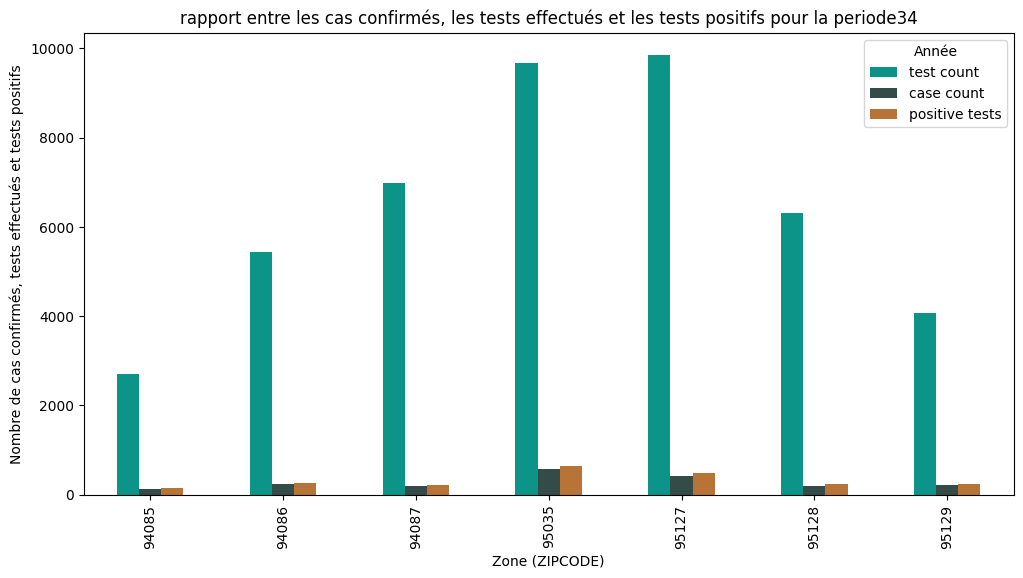

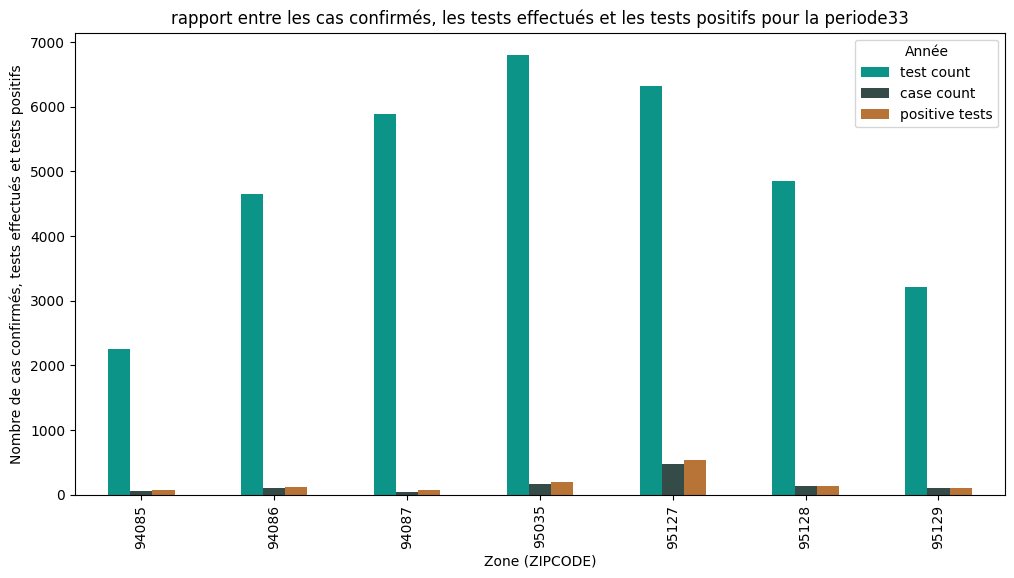

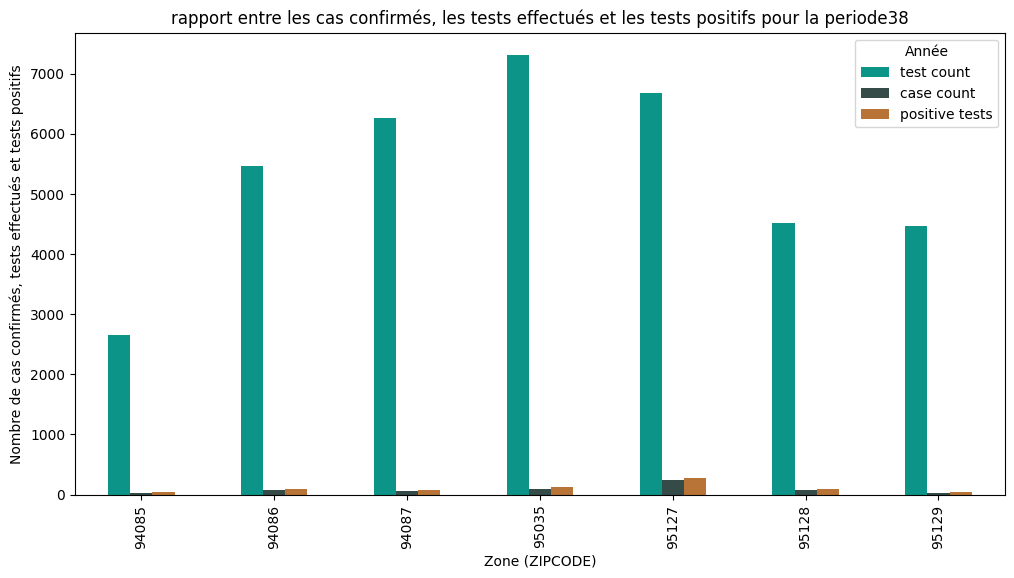

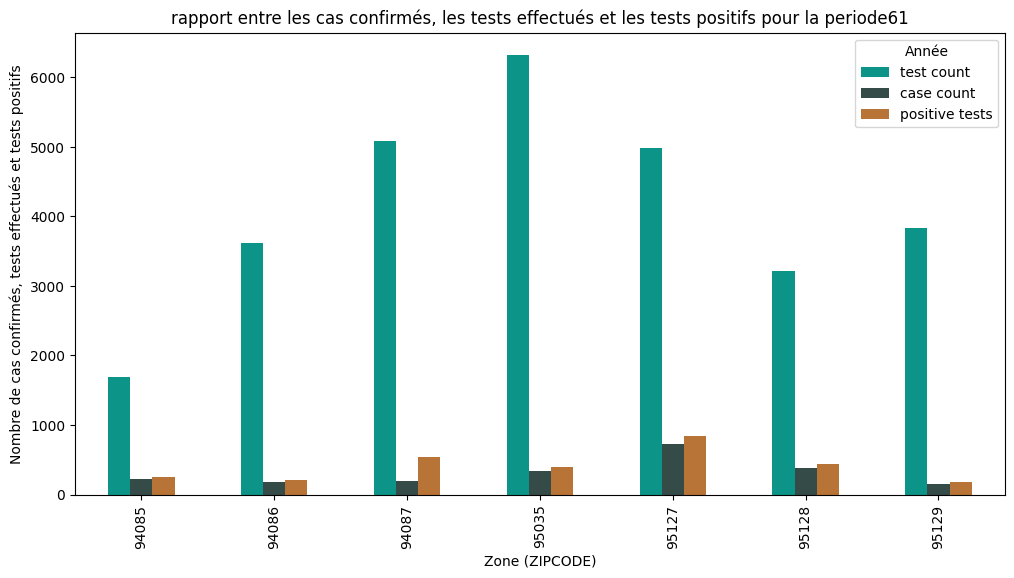

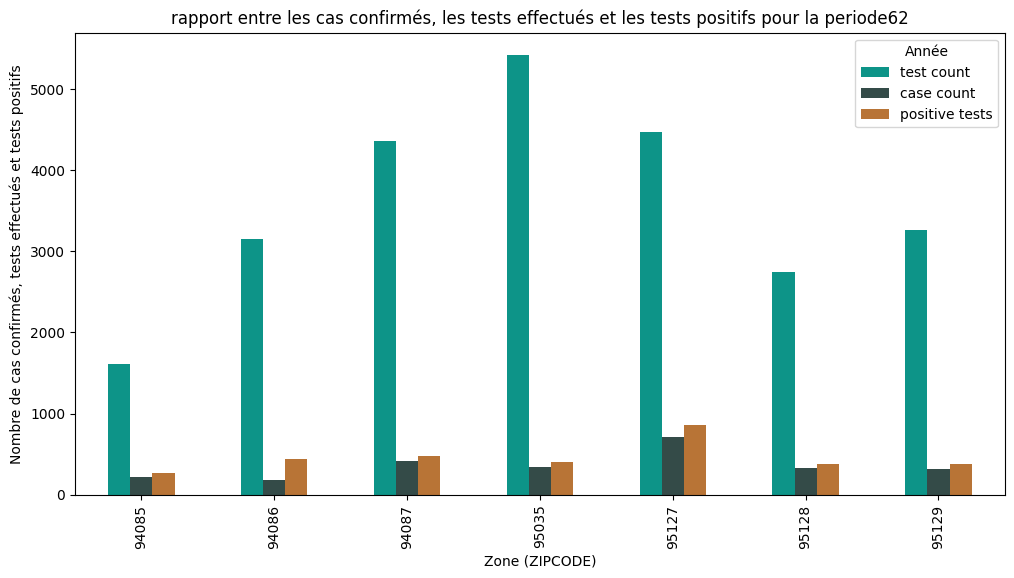

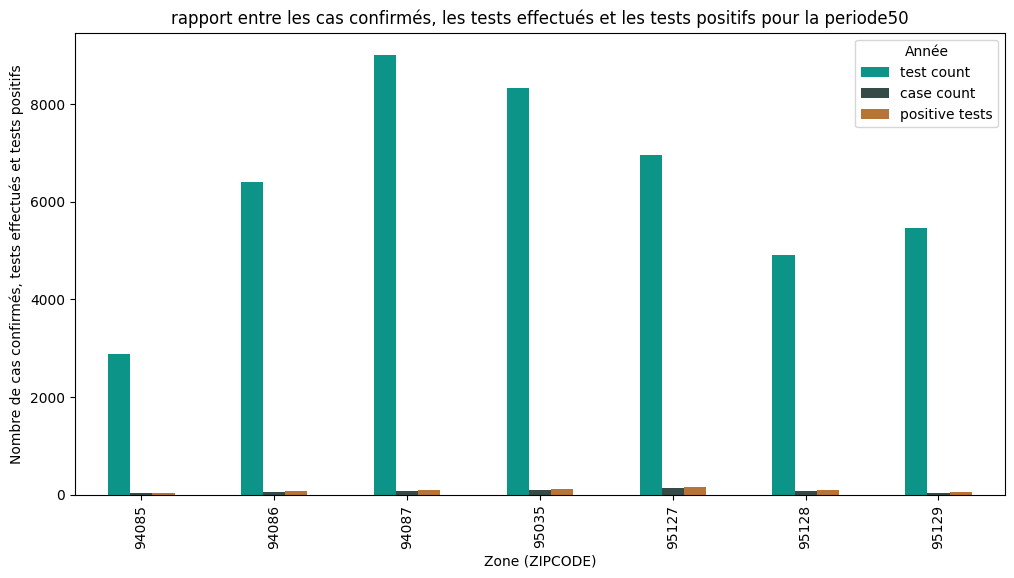

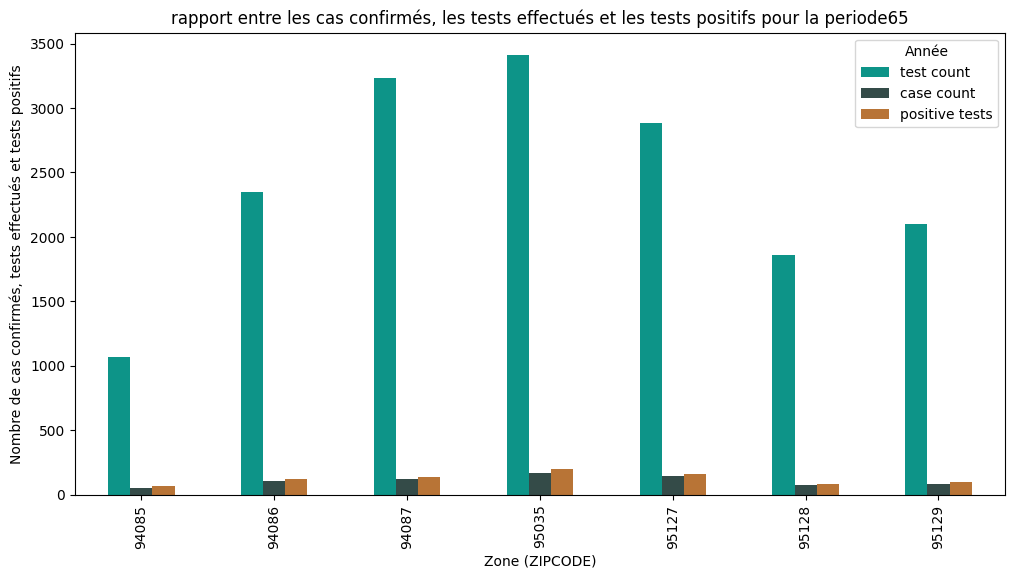

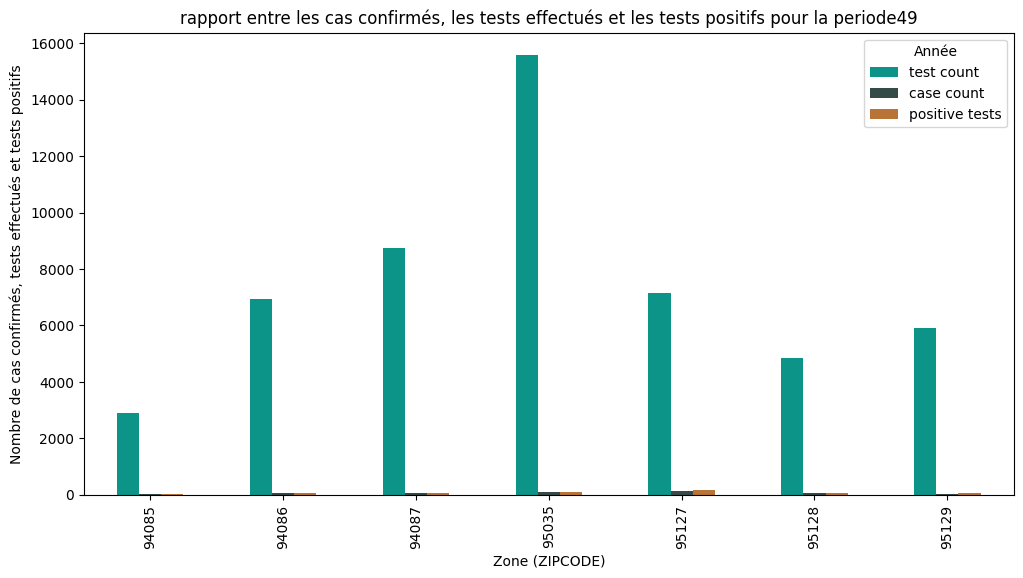

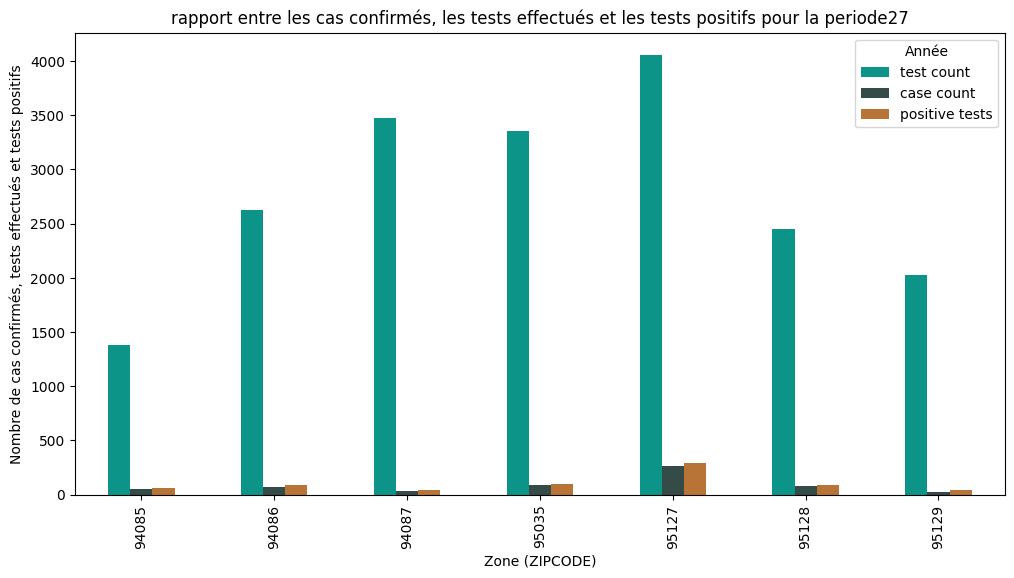

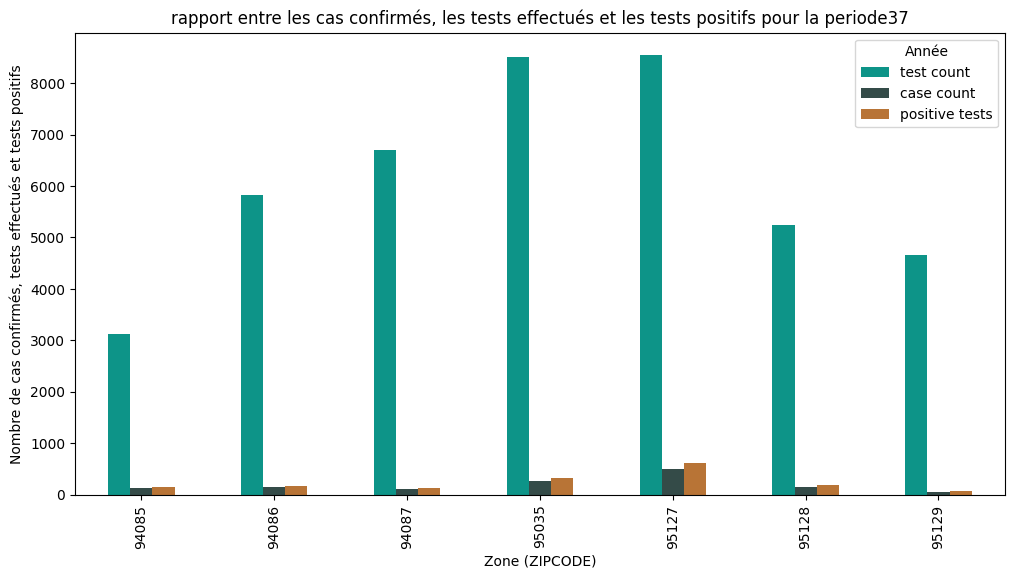

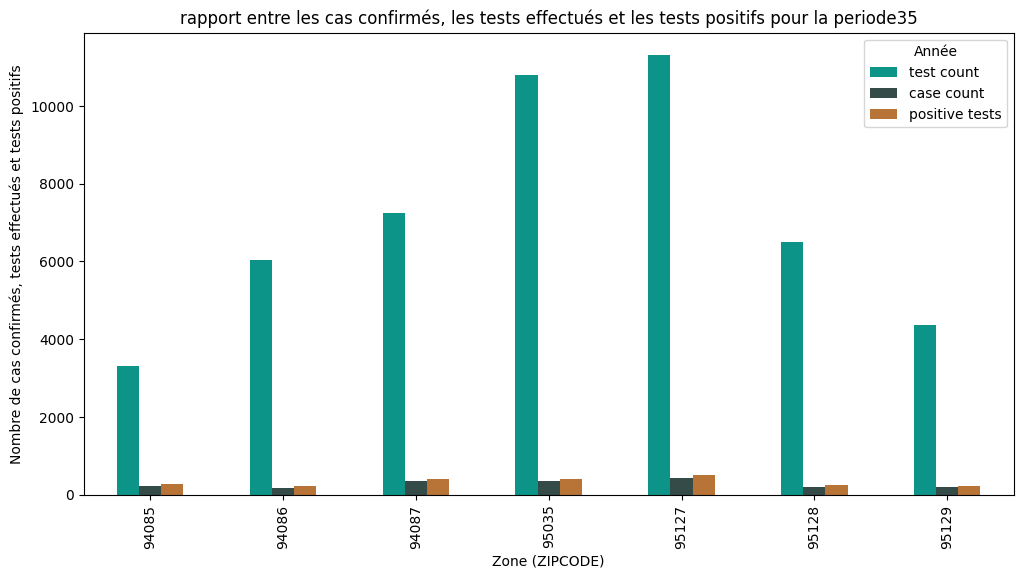

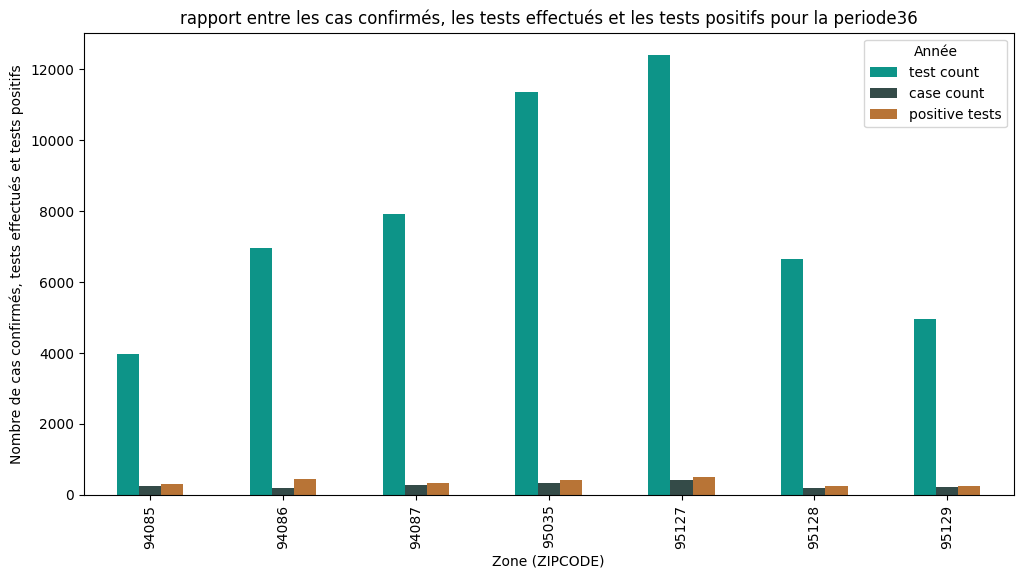

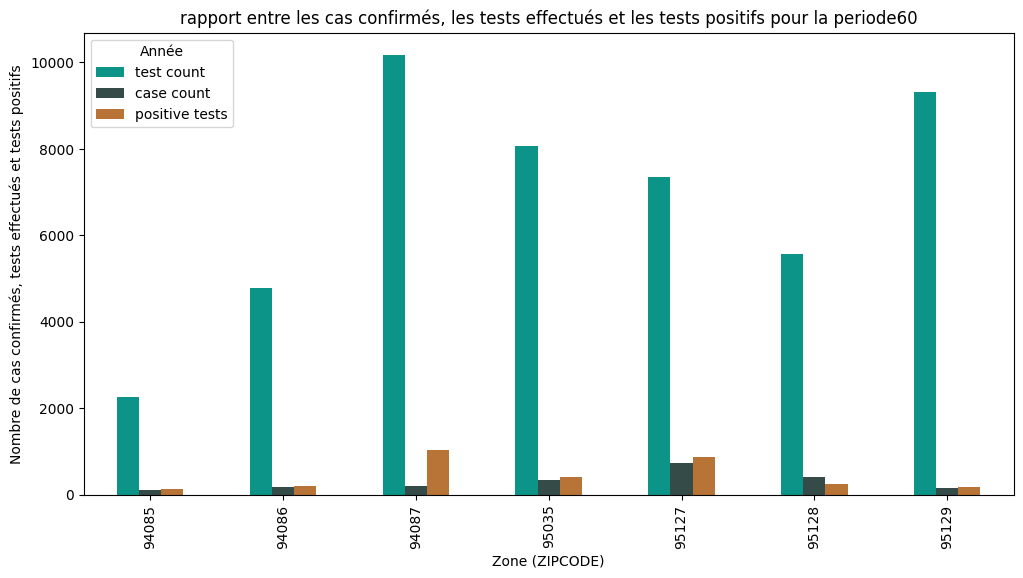

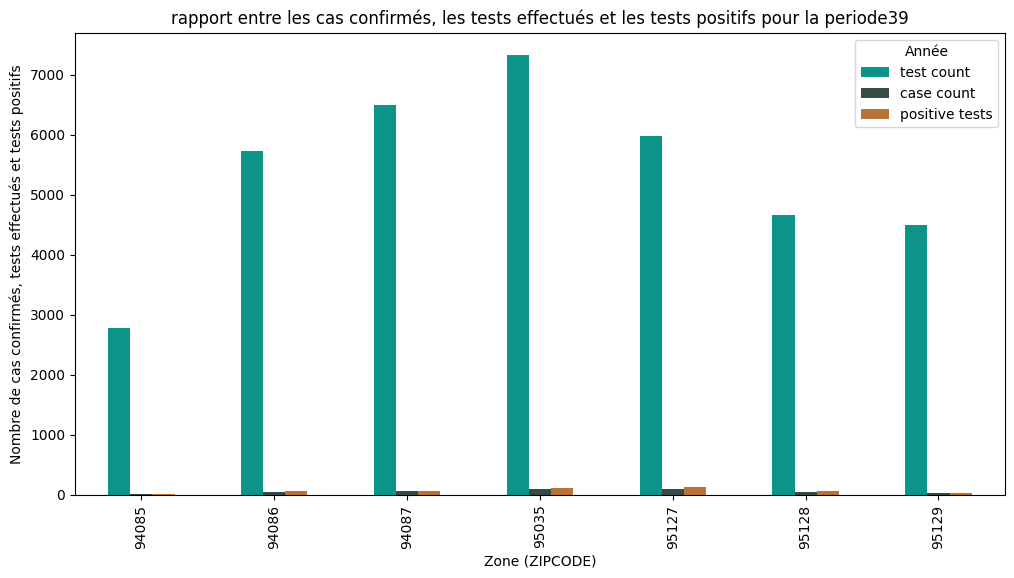

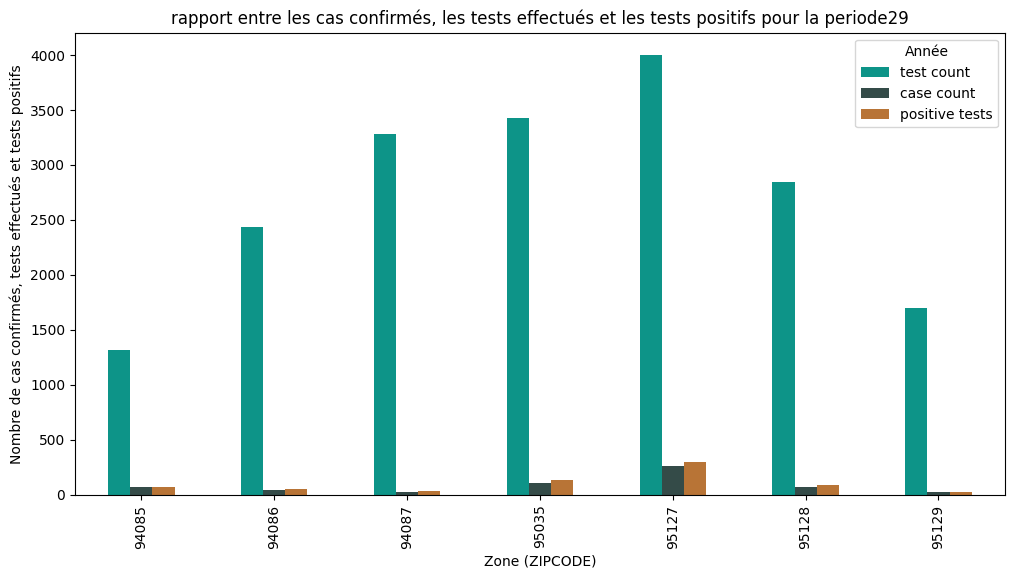

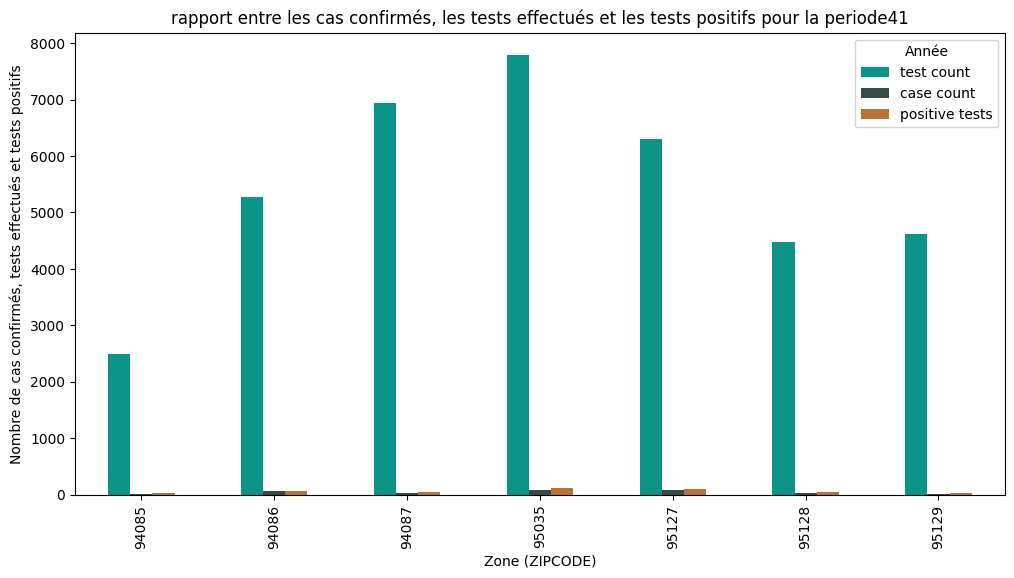

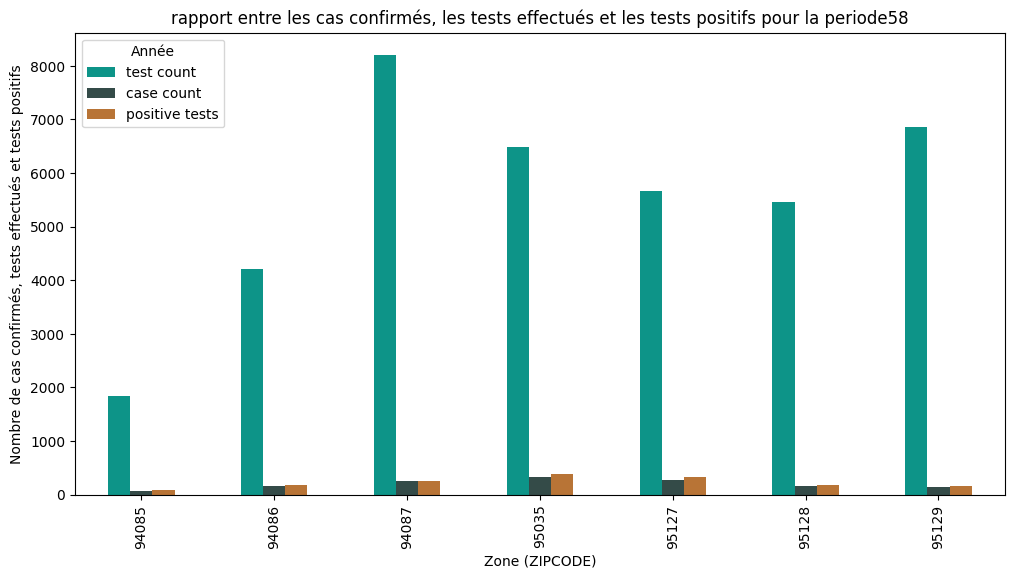

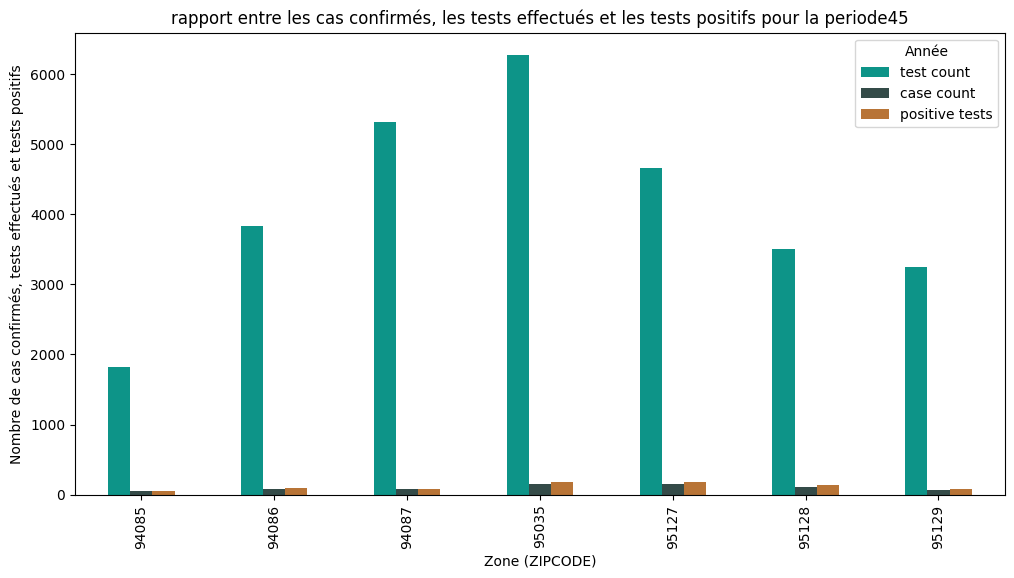

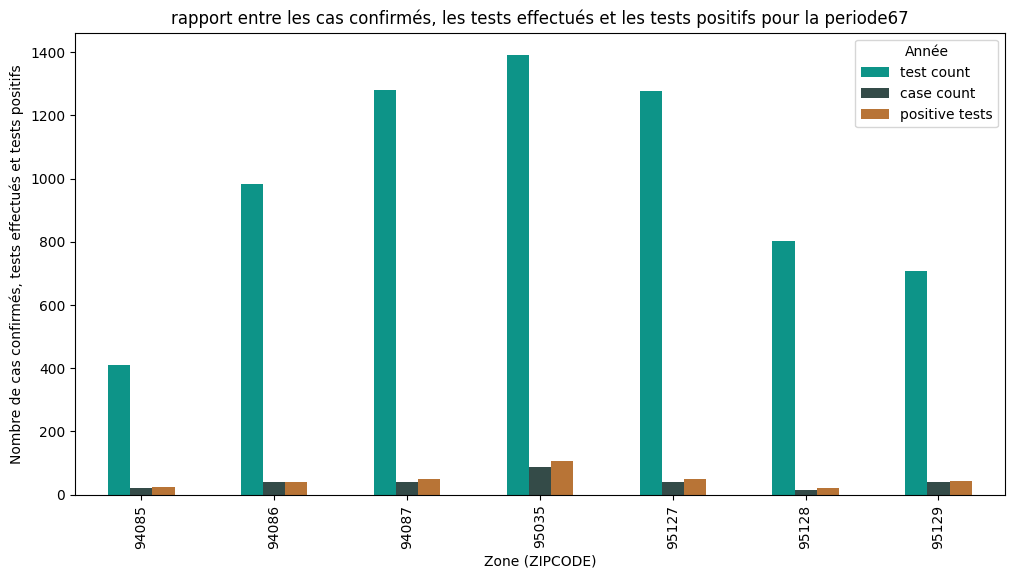

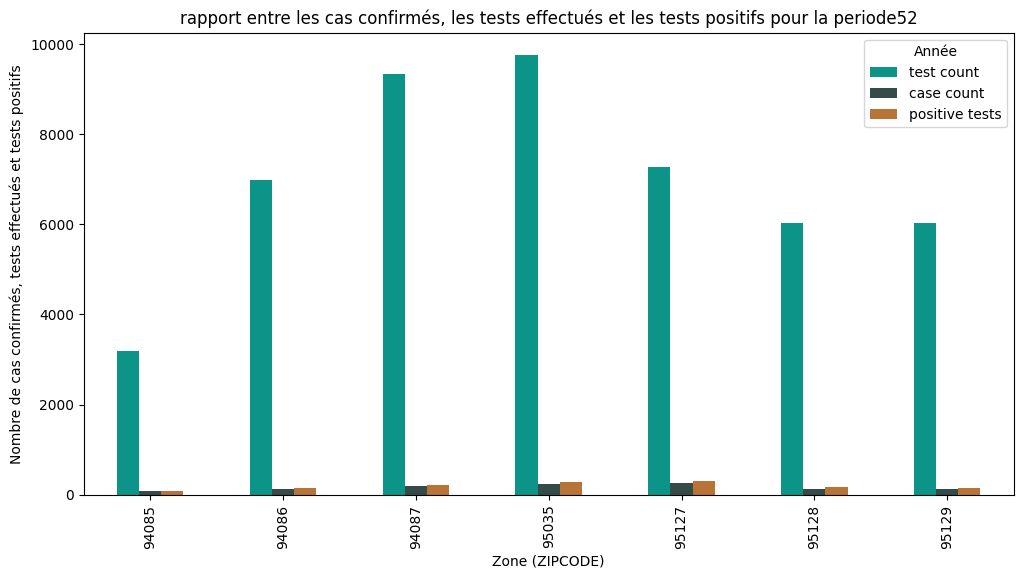

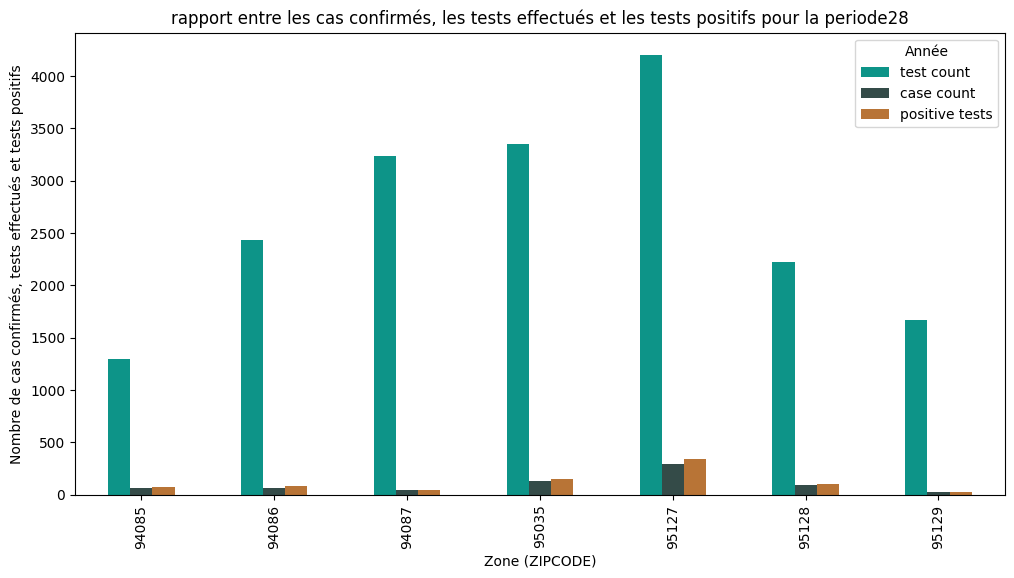

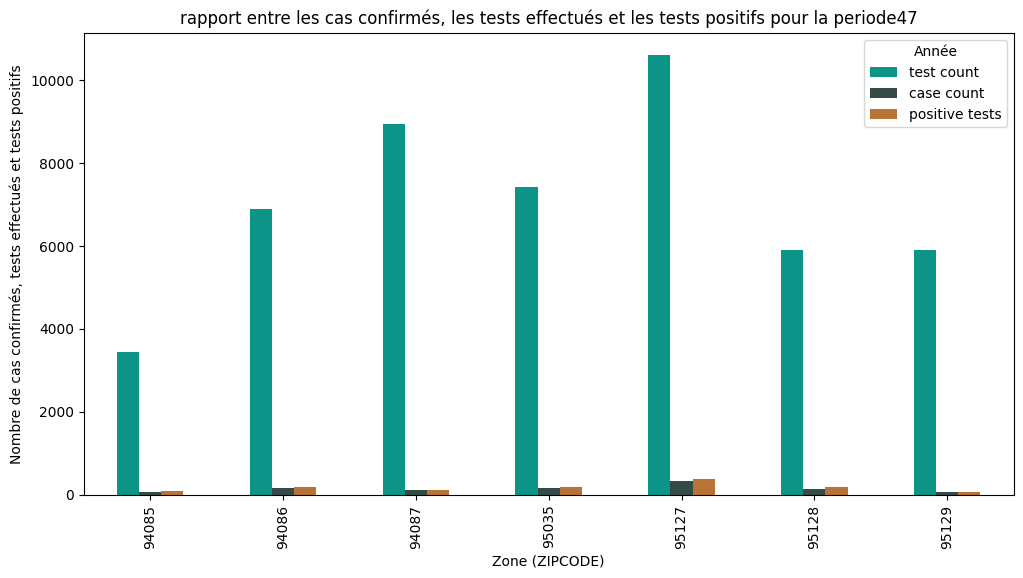

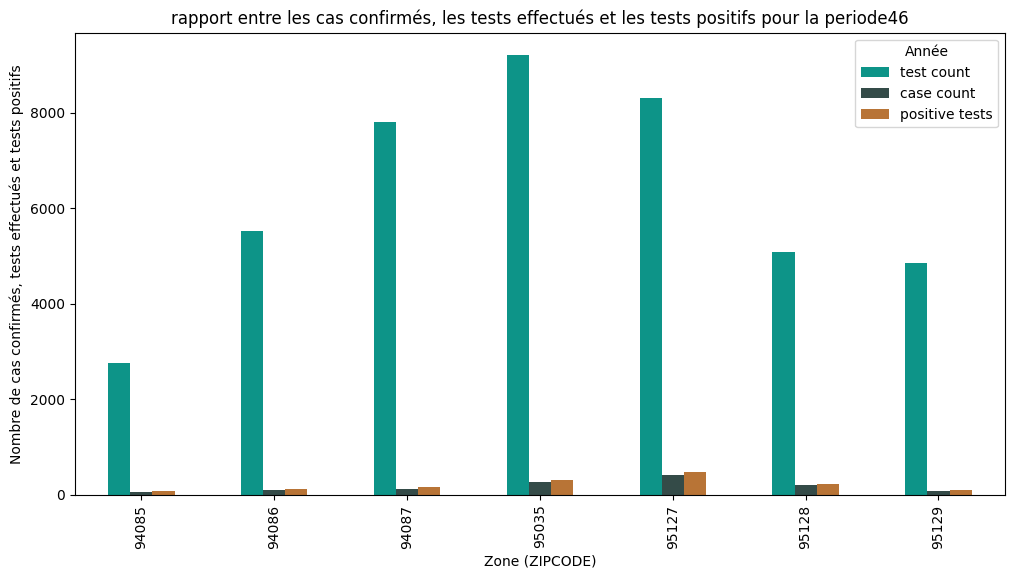

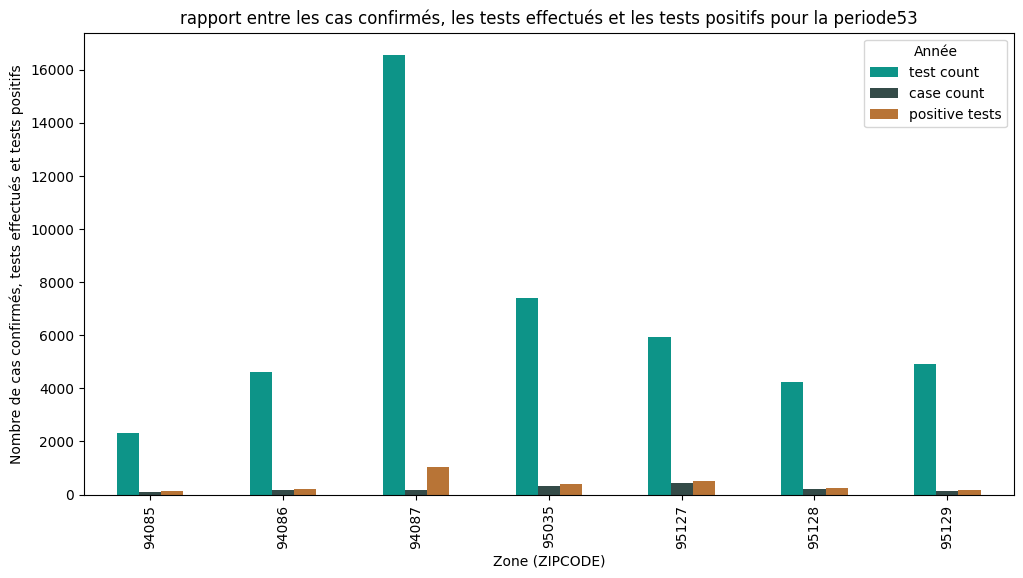

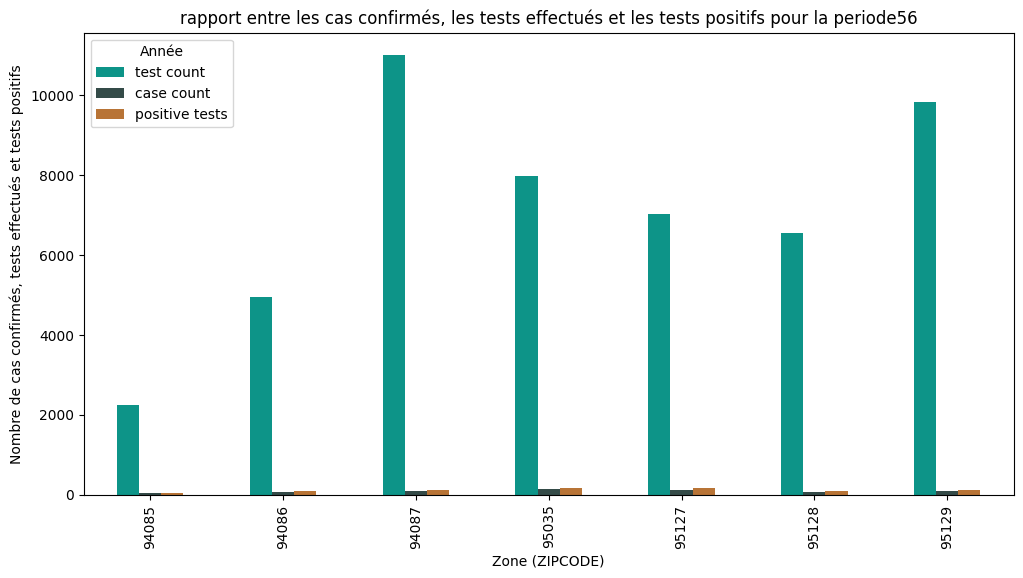

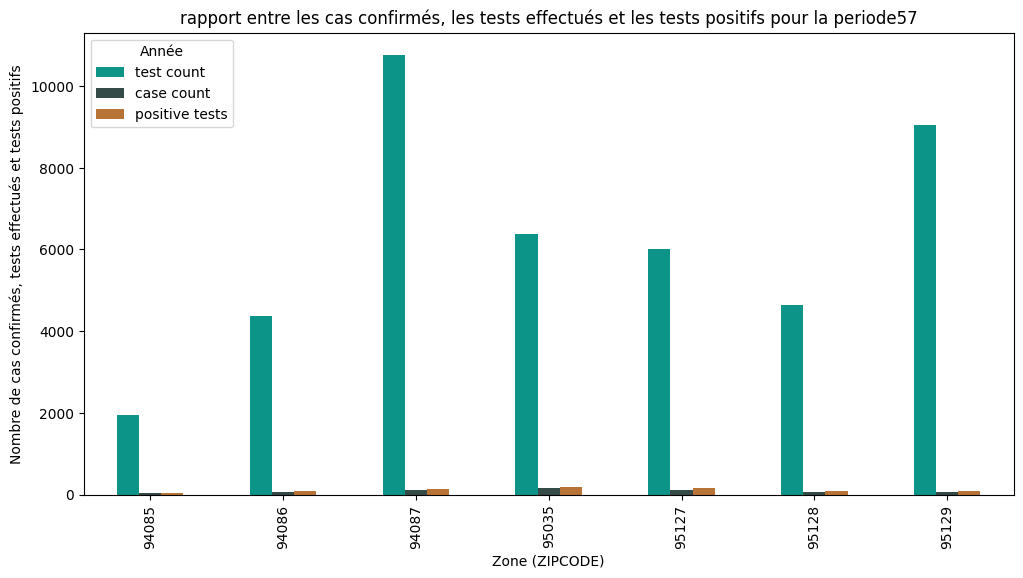

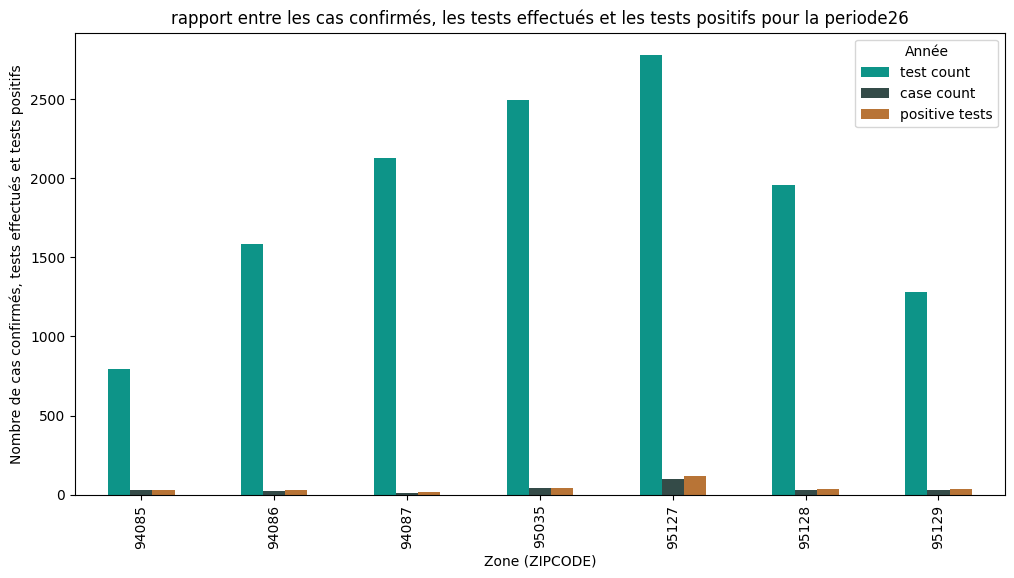

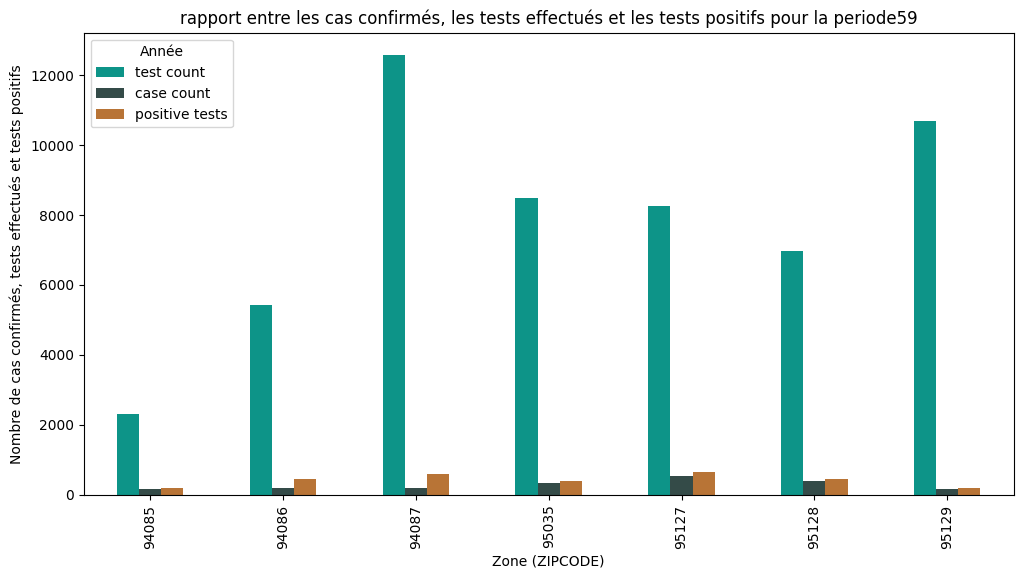

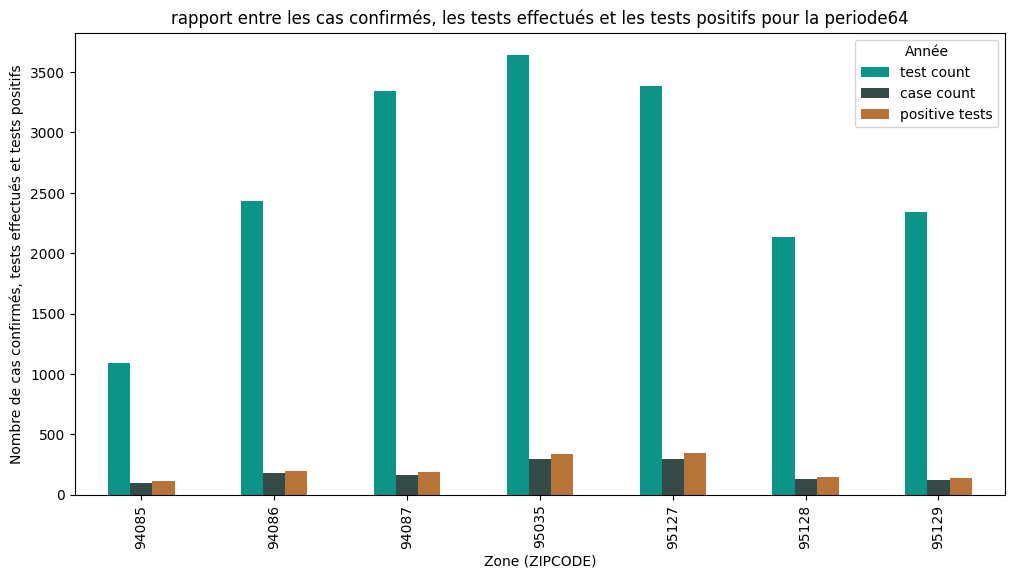

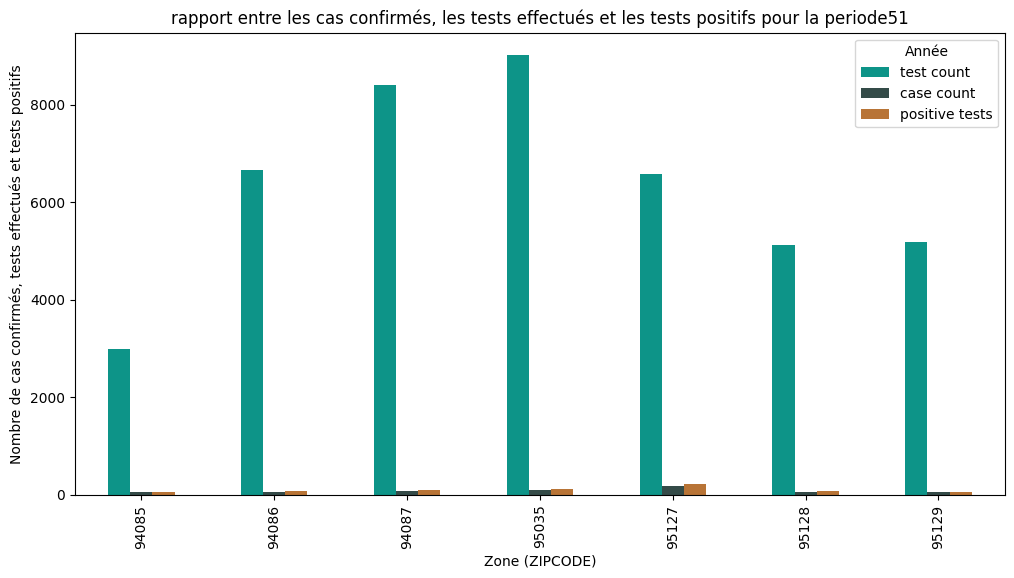

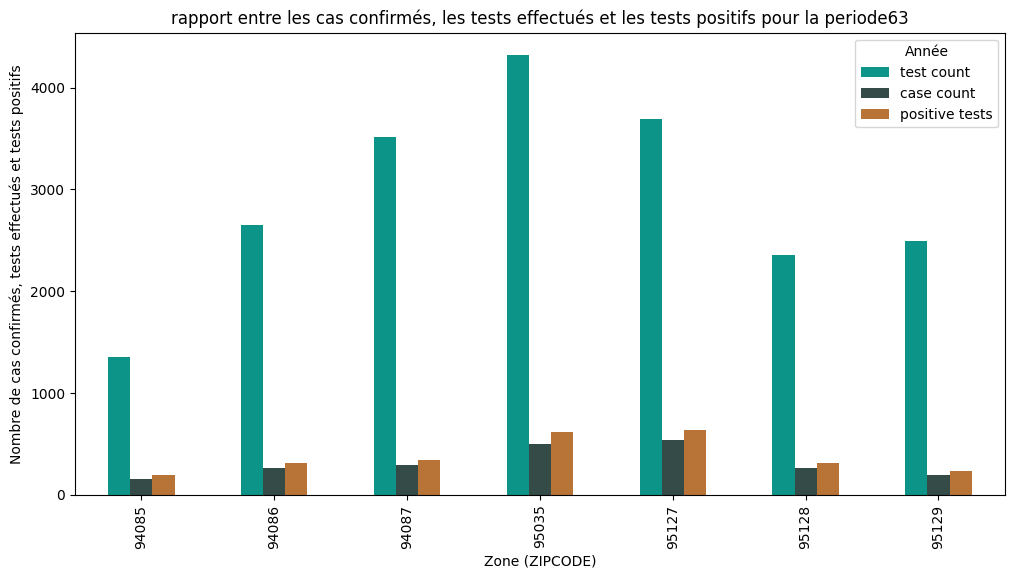

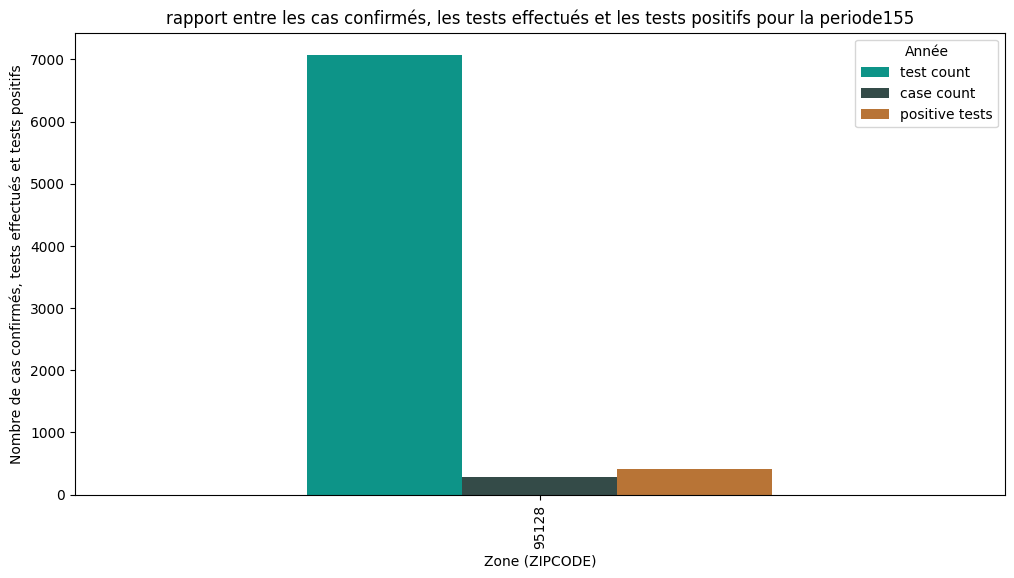

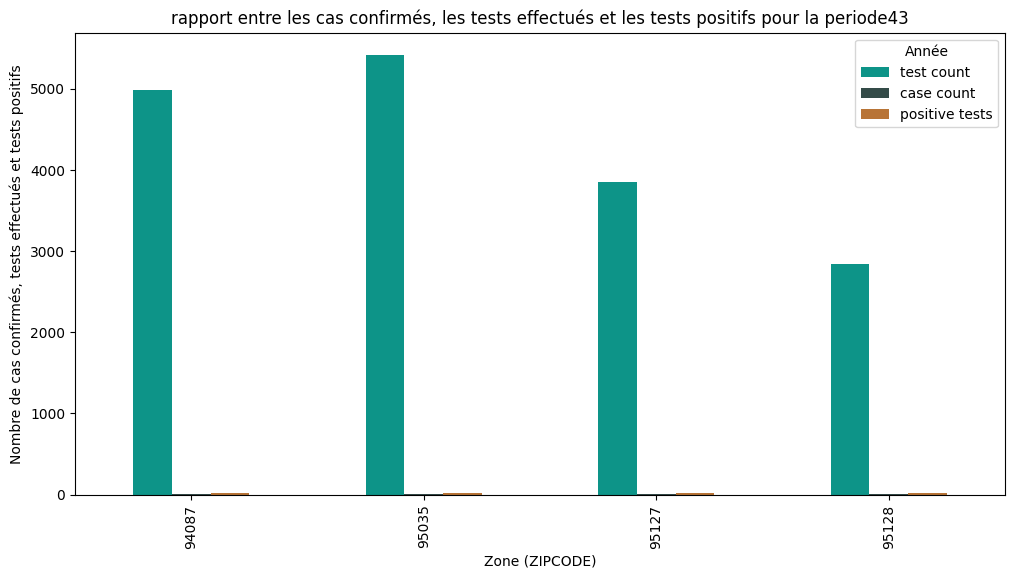

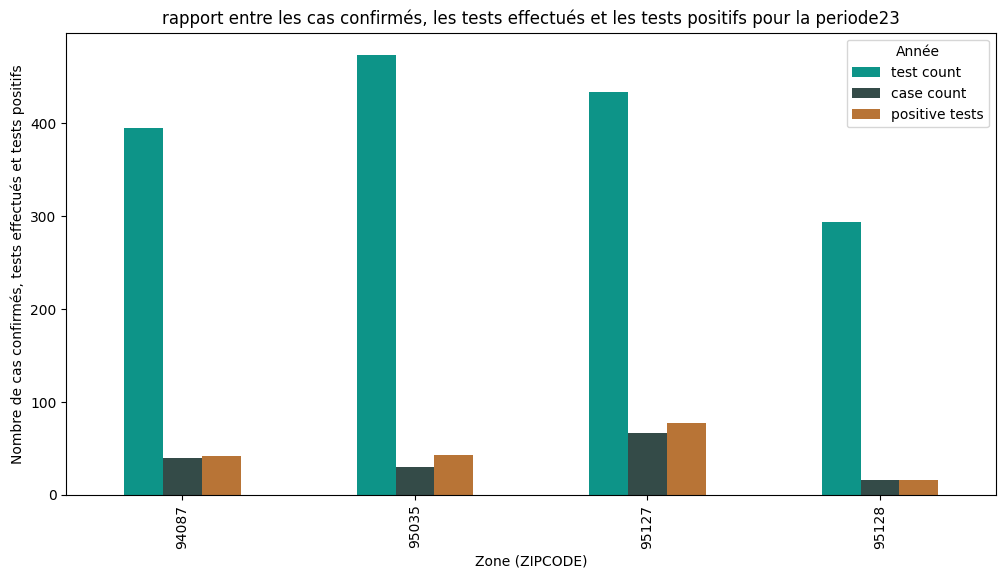

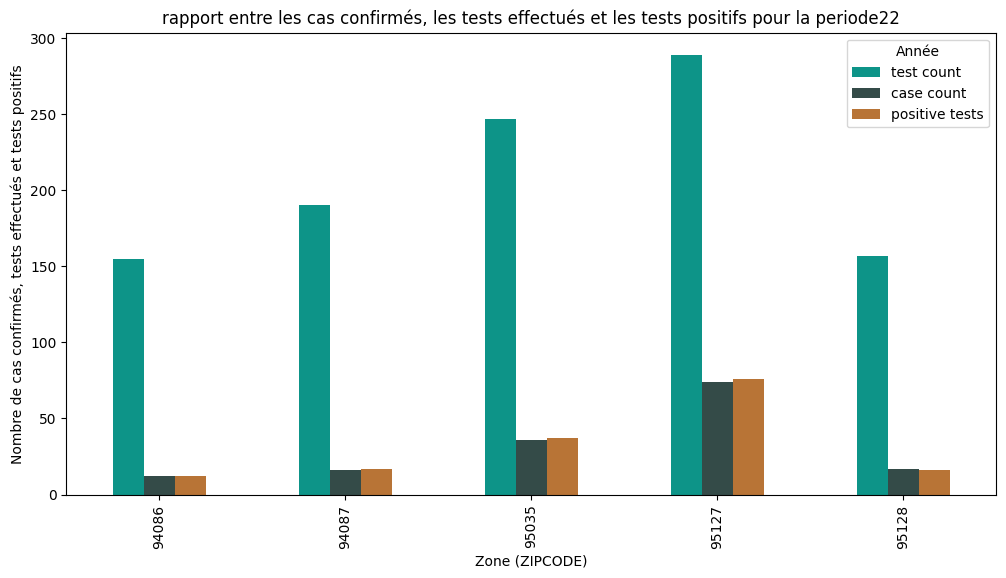

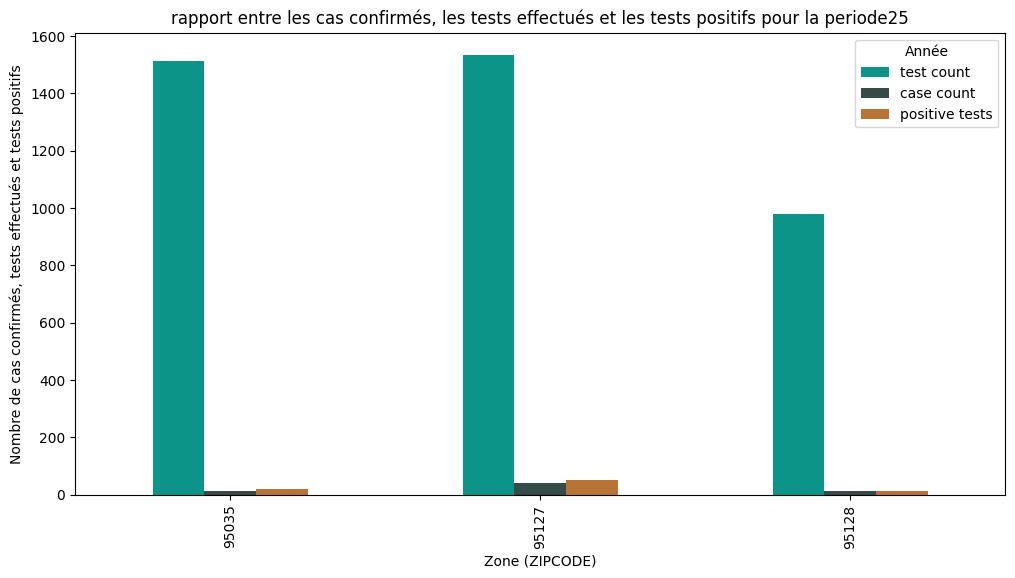

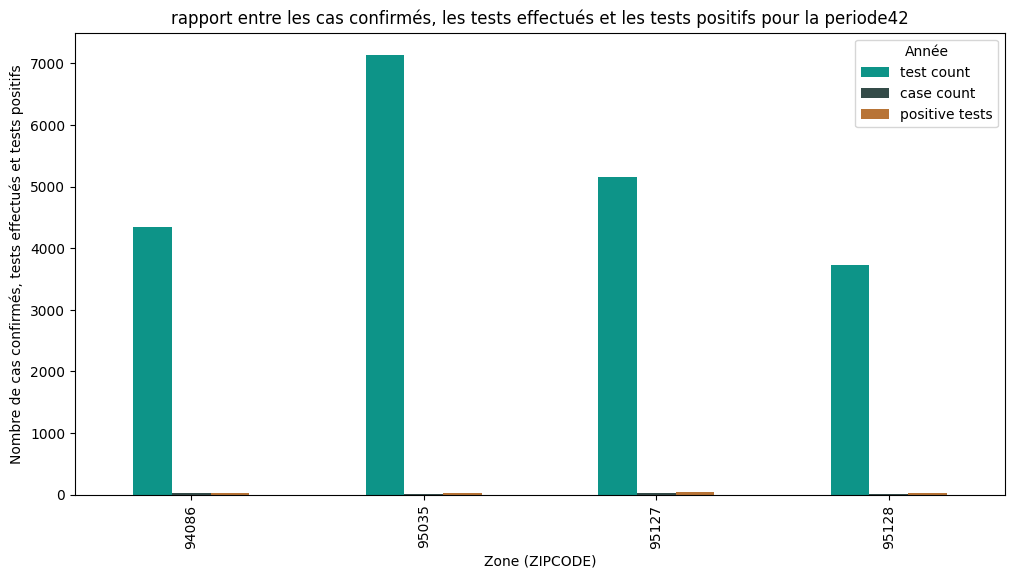

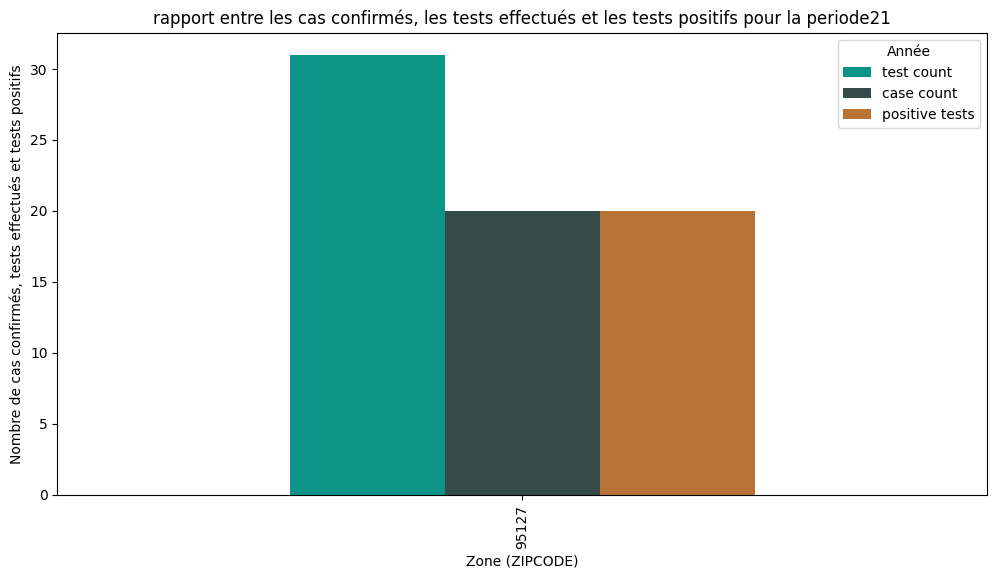

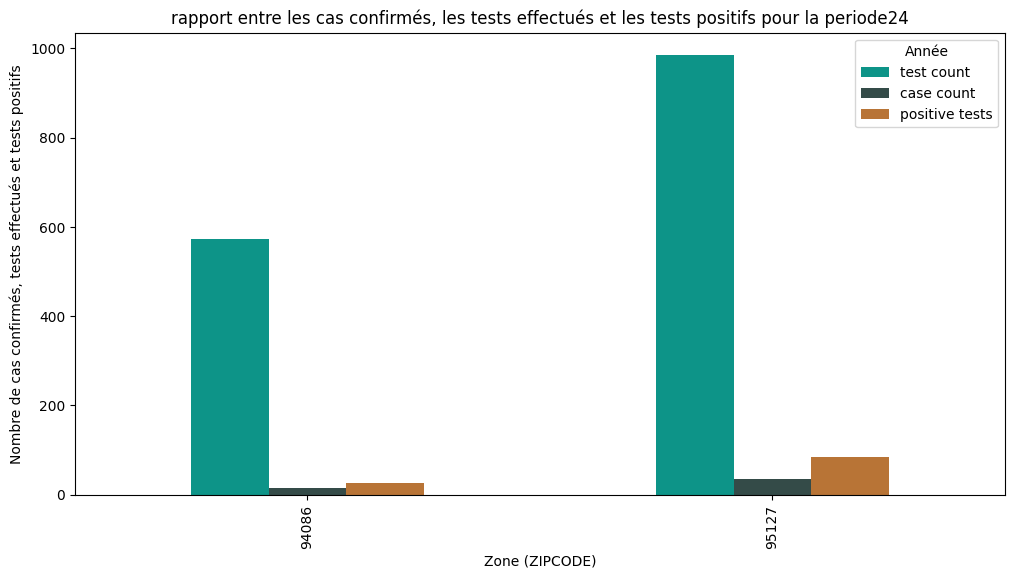

In [25]:
def rapport_cas_test_par_periode(data,periode):
    data_filtered = data[(data['time_period'] == periode)]
    grouped_data = data_filtered.groupby(['zcta'])[['test count','case count', 'positive tests']].sum()
    grouped_data.plot(kind='bar', figsize=(12, 6), color=custom_colors)
    plt.title('rapport entre les cas confirmés, les tests effectués et les tests positifs pour la periode'+str(periode))
    plt.xlabel('Zone (ZIPCODE)')
    plt.ylabel('Nombre de cas confirmés, tests effectués et tests positifs')
    plt.legend(title='Année')
    plt.show()
periodes = data2['time_period'].unique()
for periode in periodes:
    rapport_cas_test_par_periode(data2,periode)

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

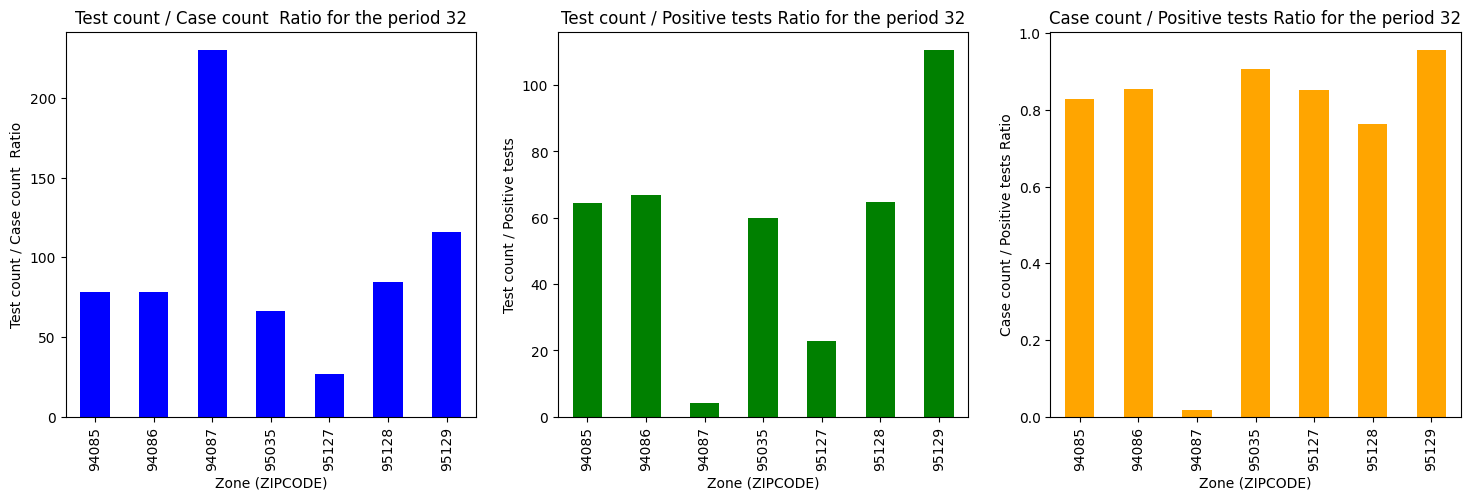

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

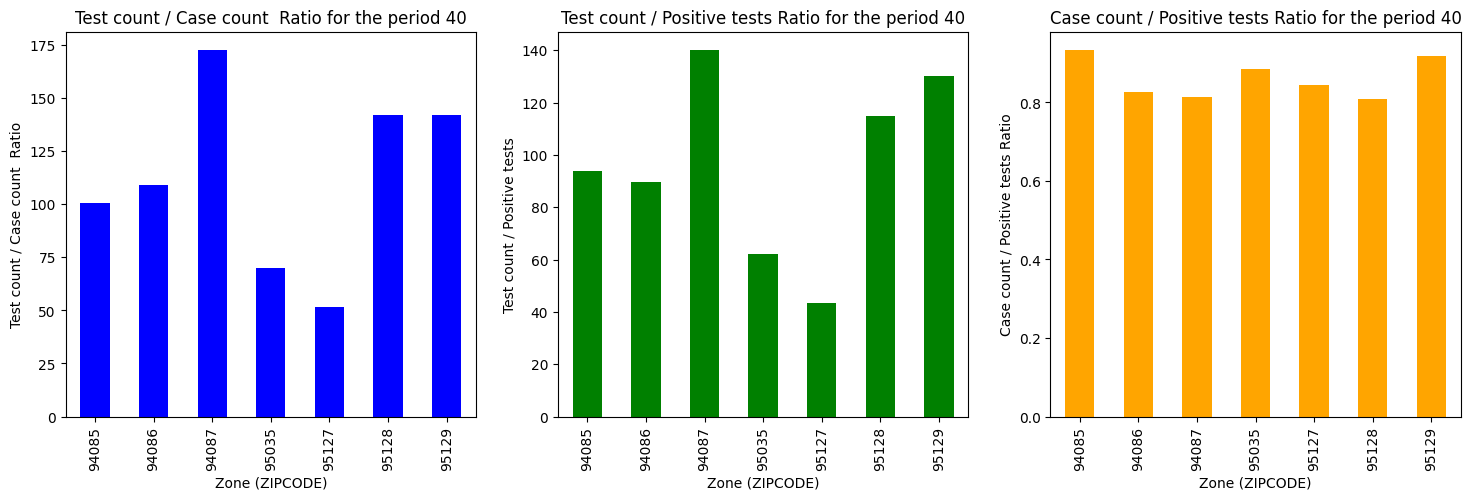

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

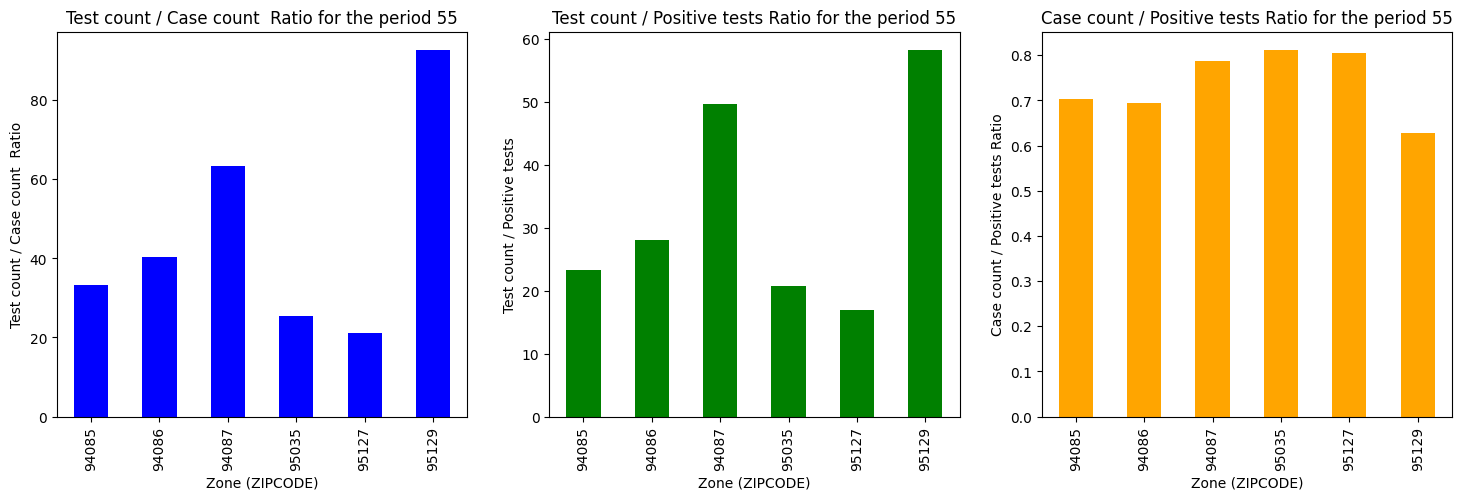

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

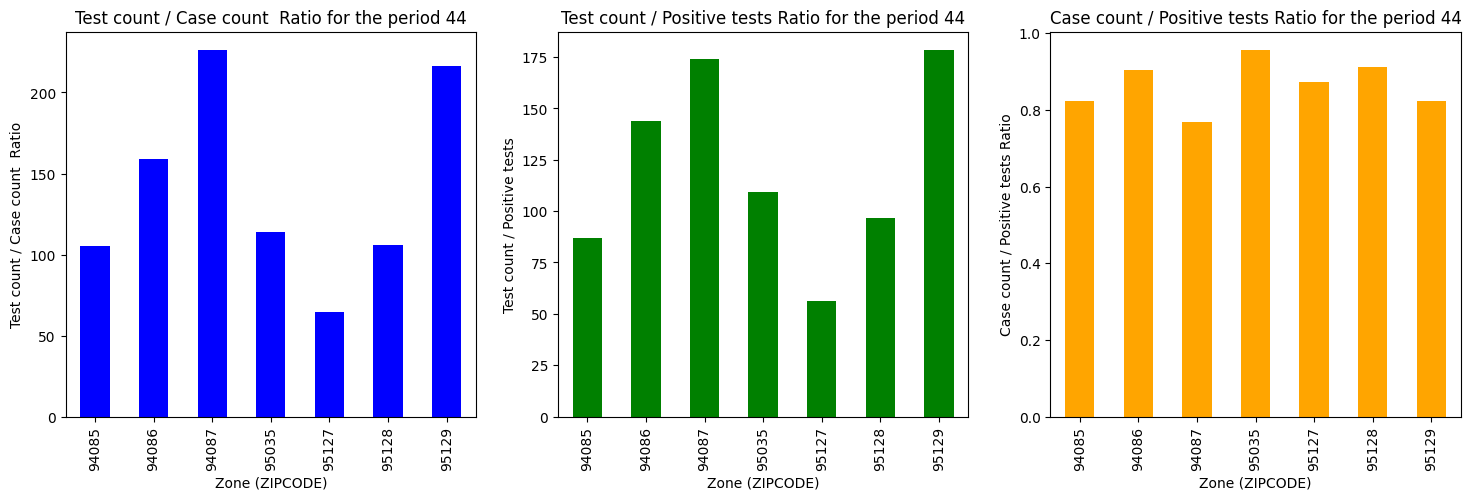

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

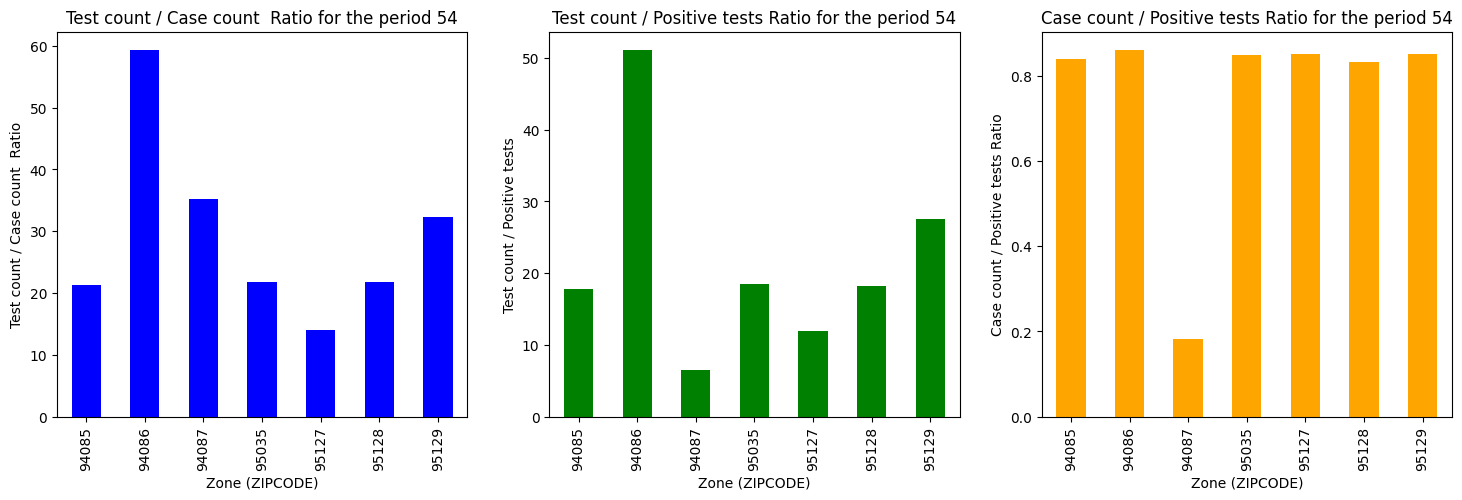

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

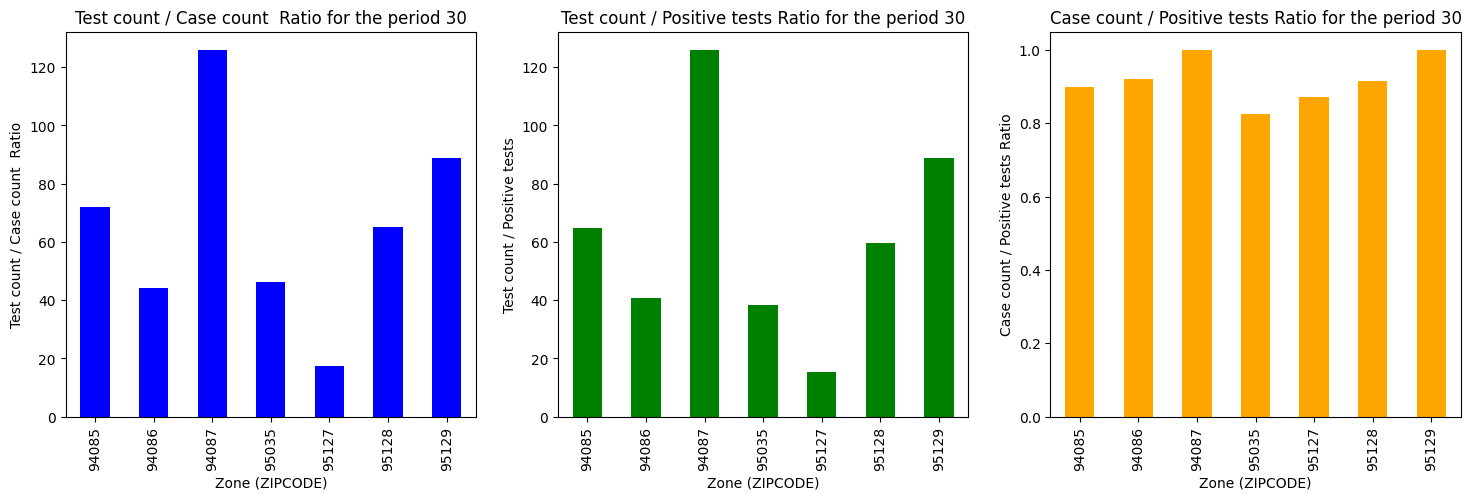

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

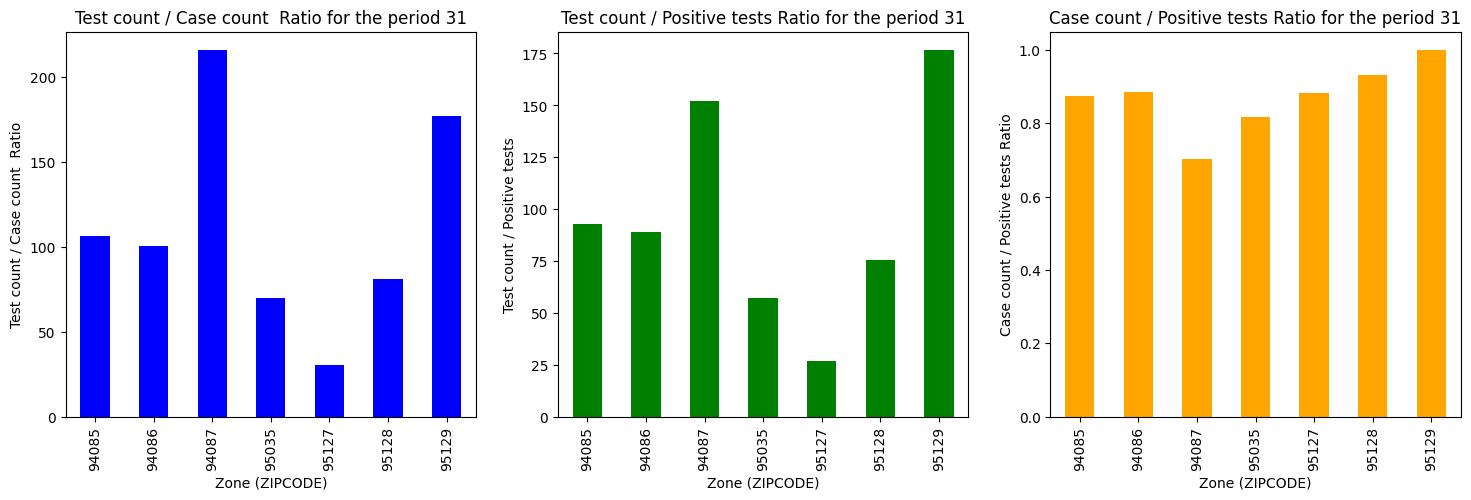

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

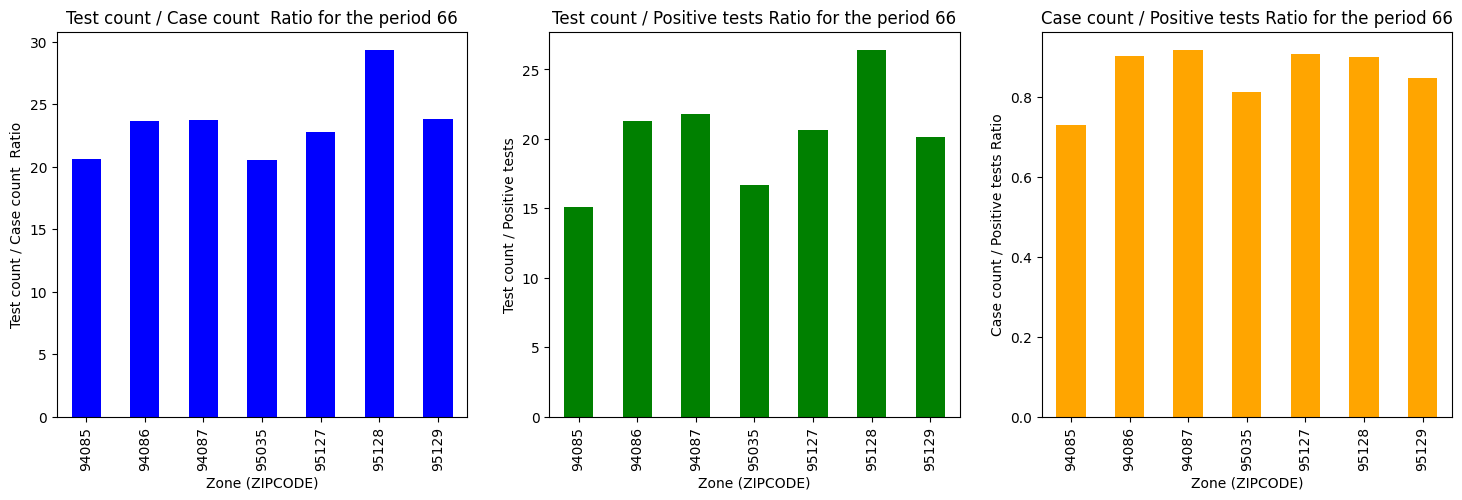

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

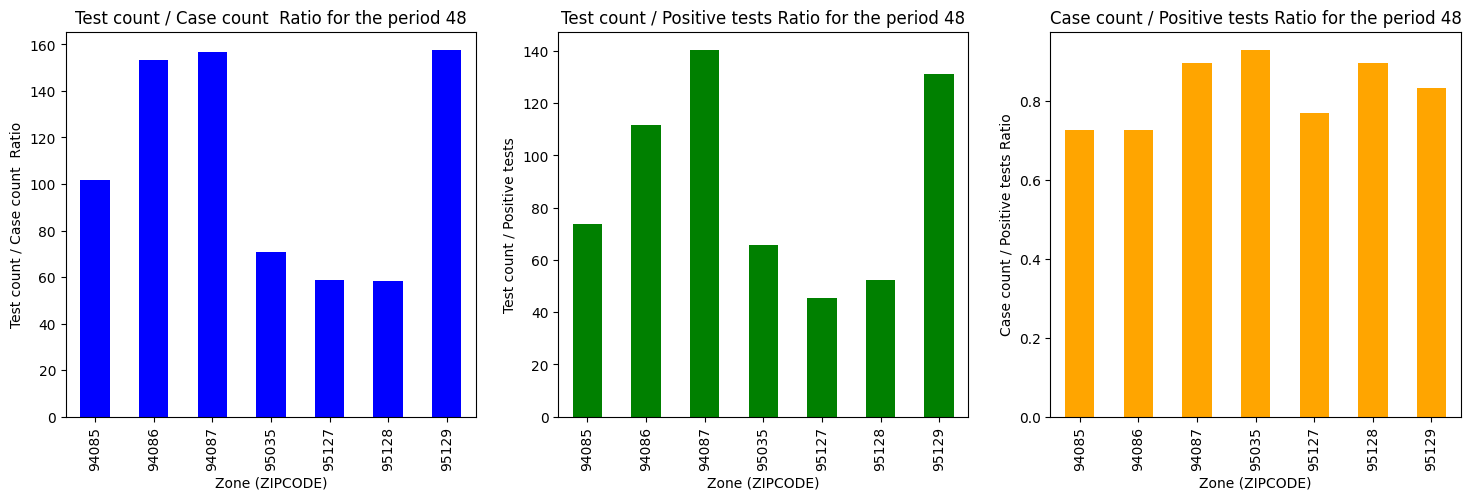

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

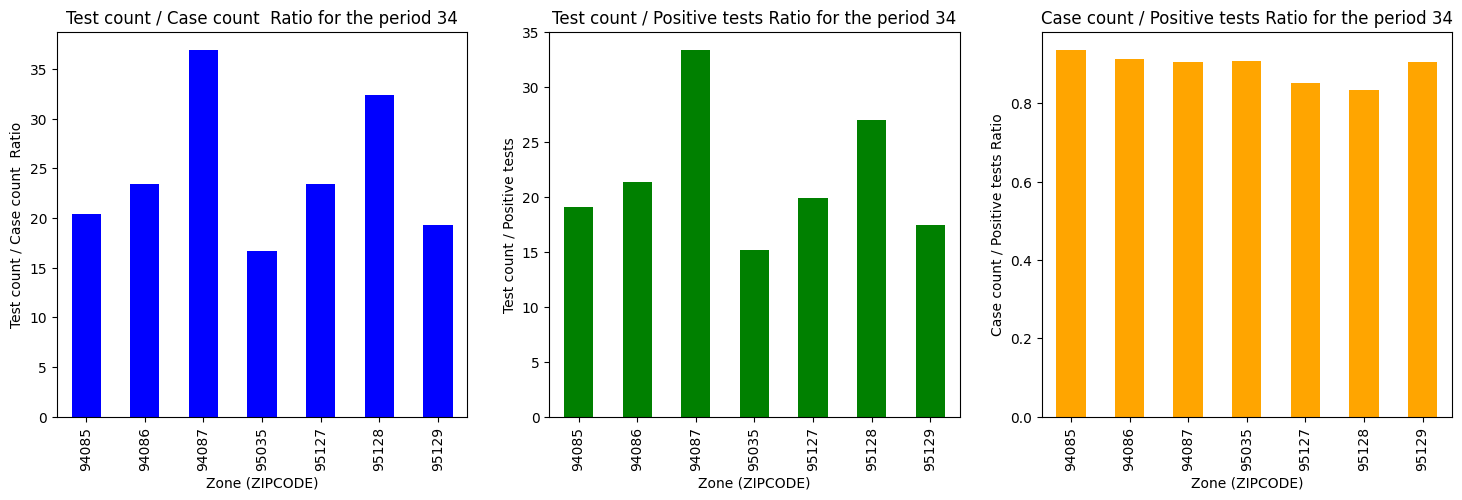

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

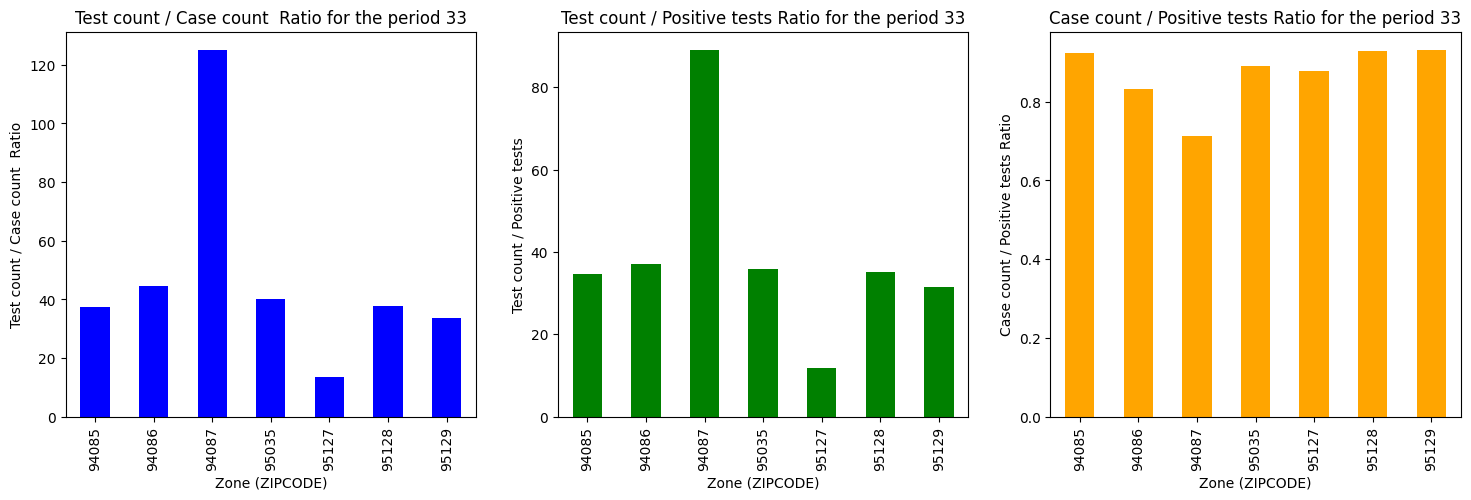

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

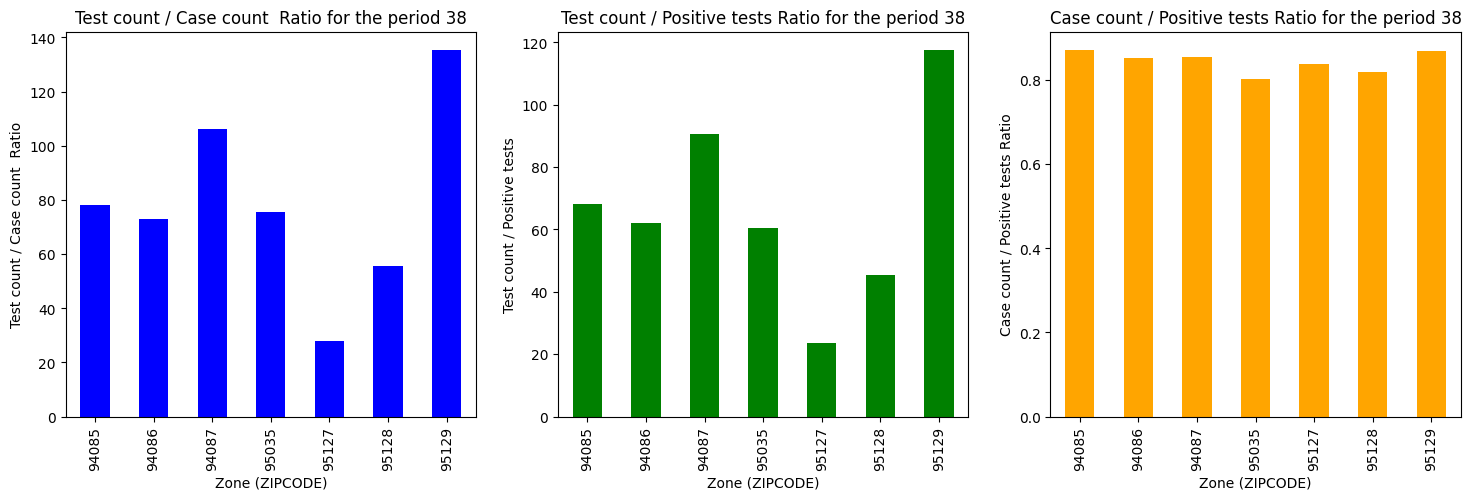

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

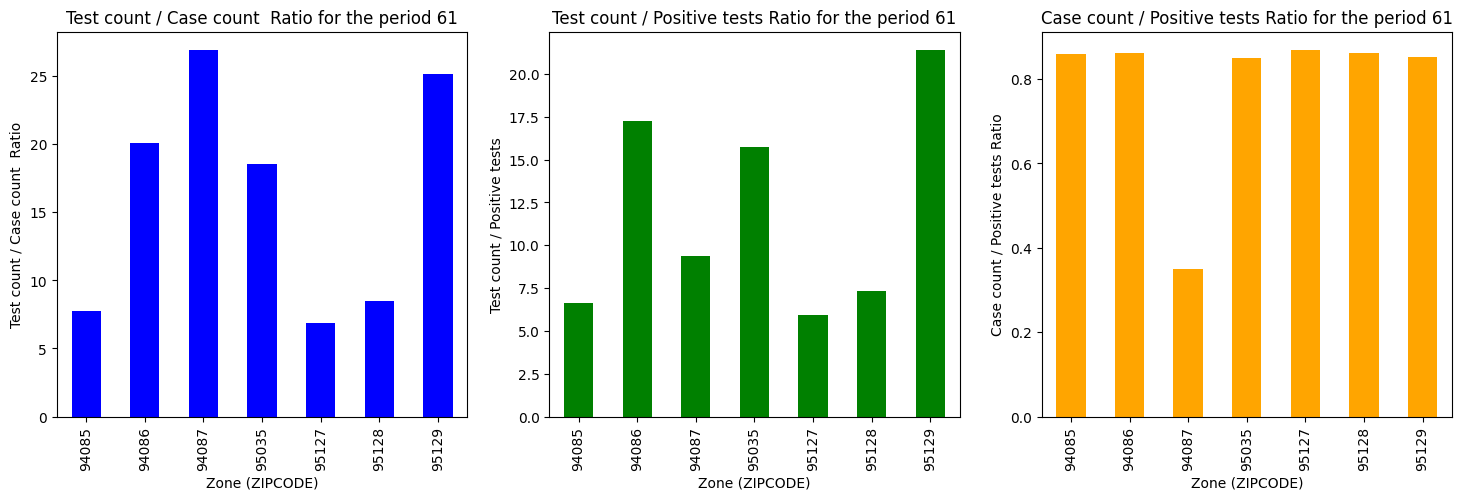

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

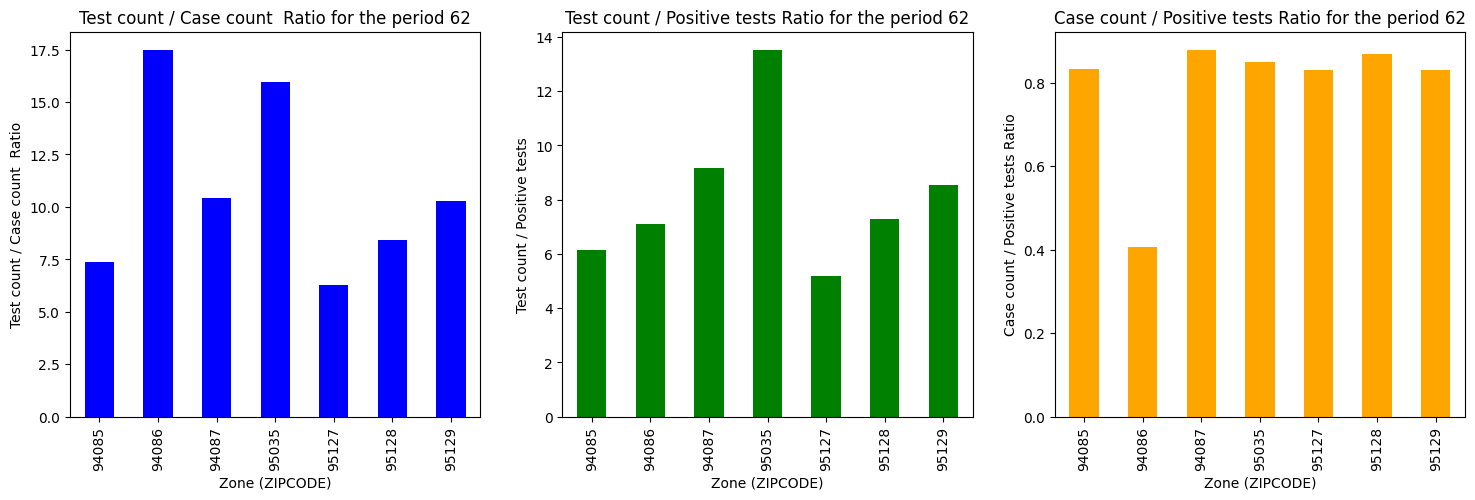

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

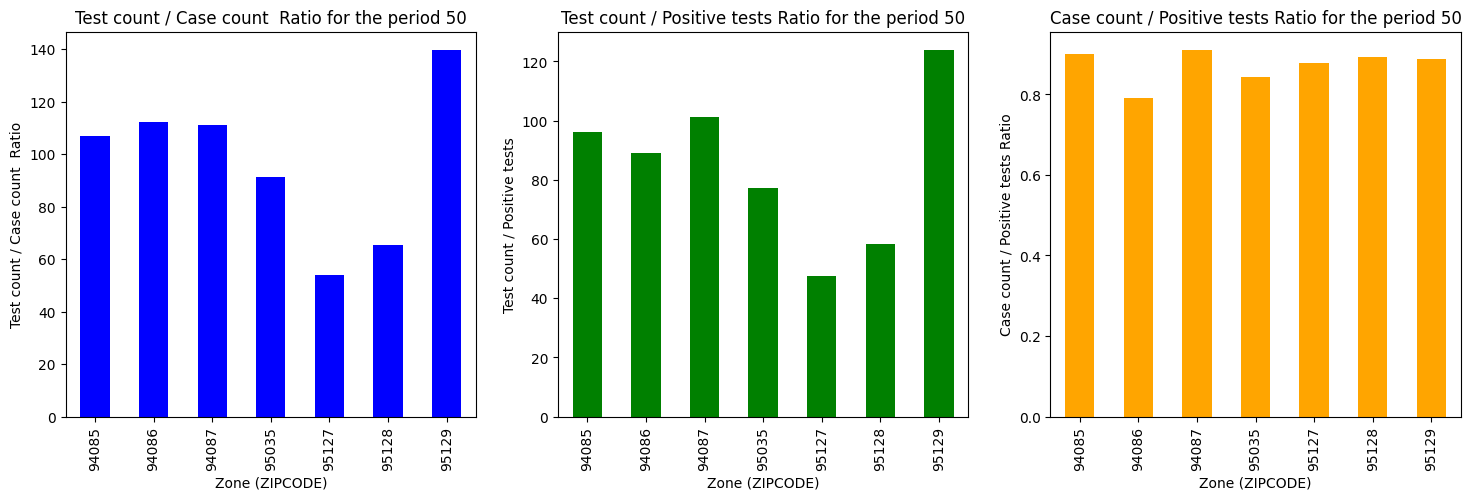

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

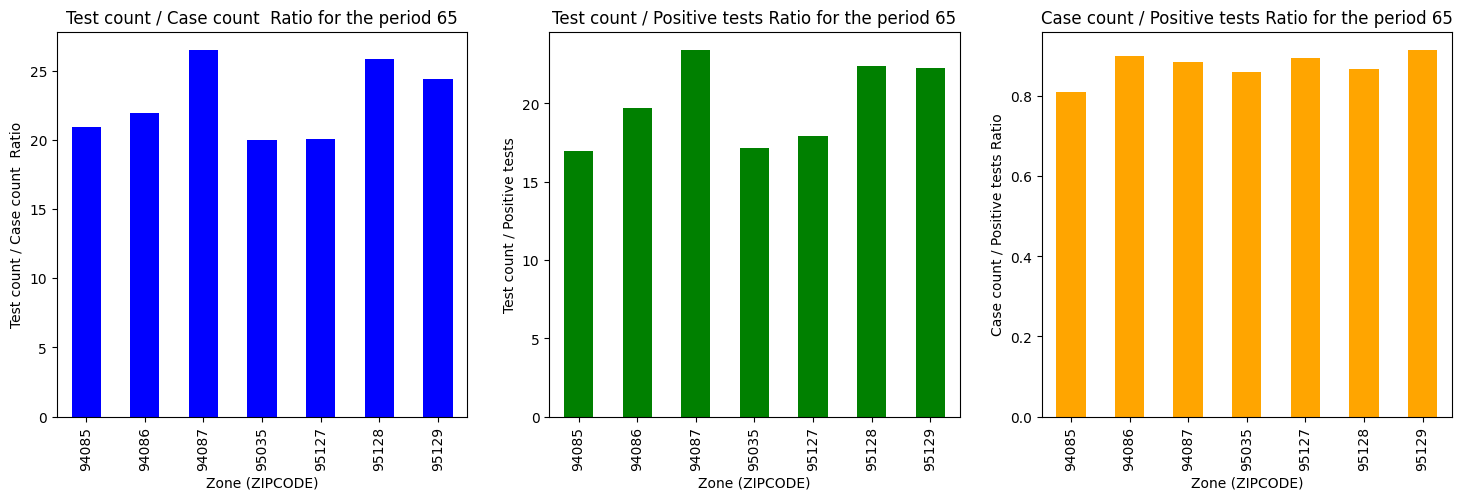

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

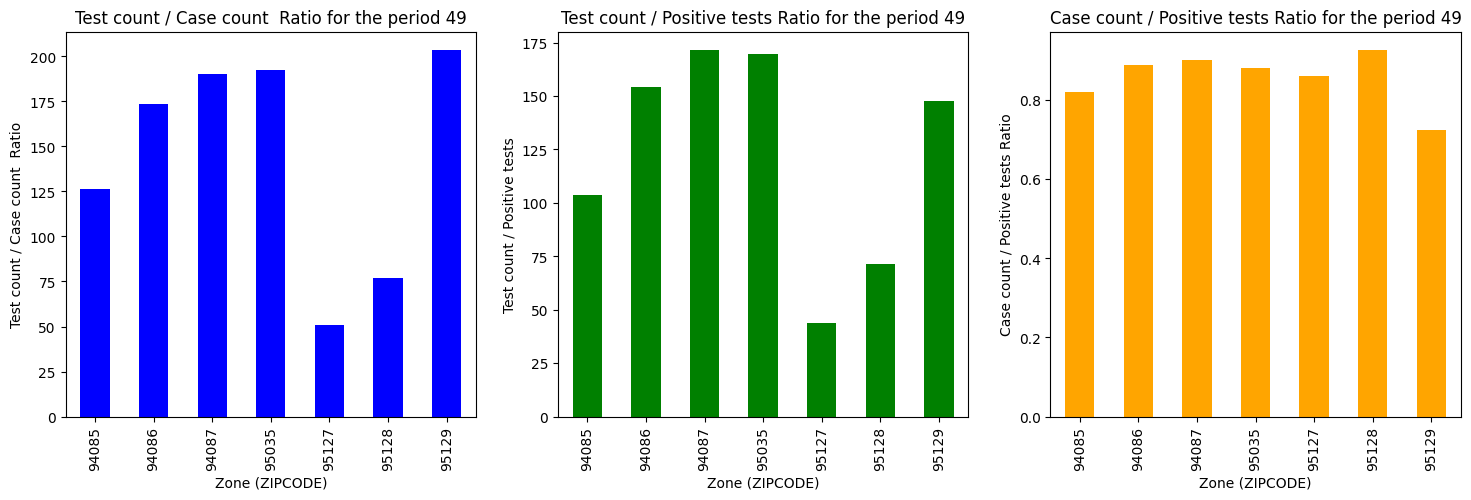

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

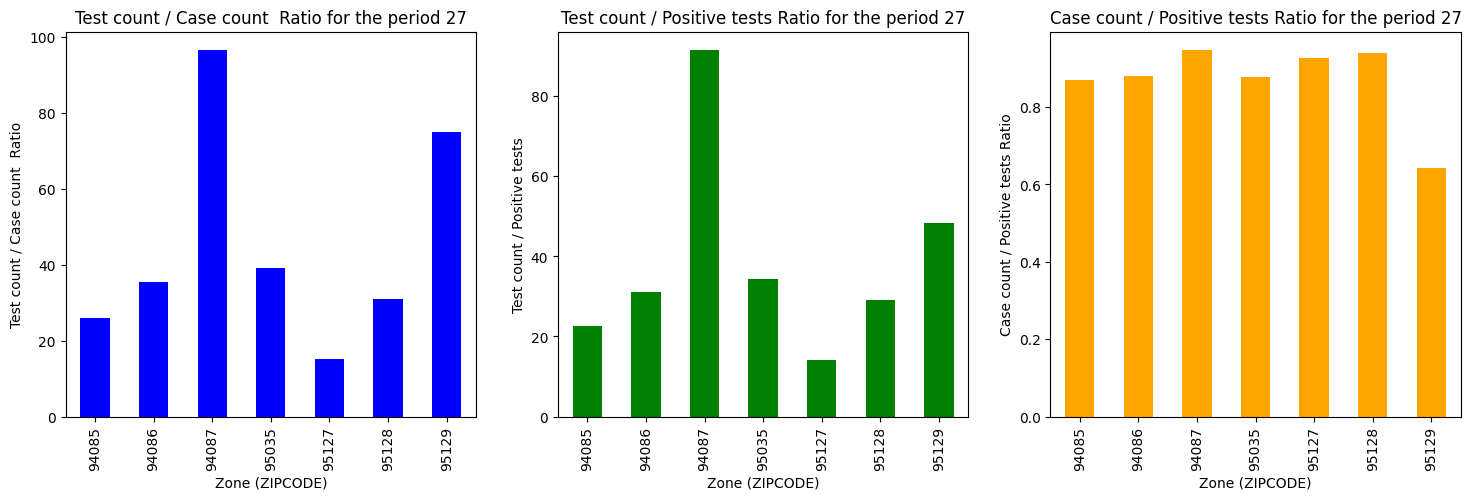

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

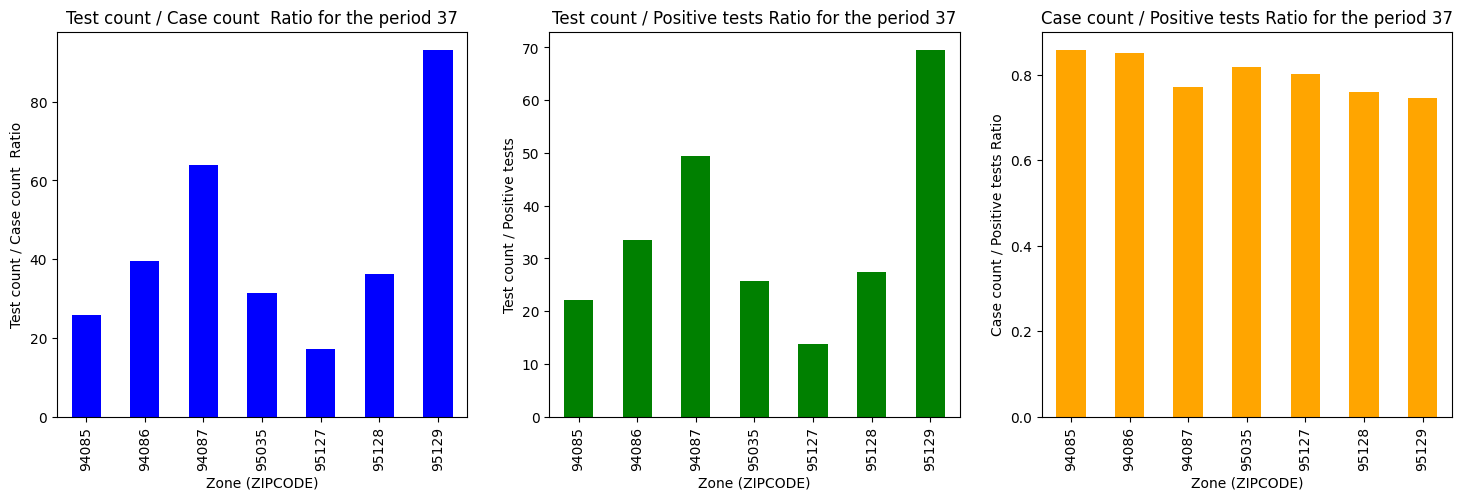

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

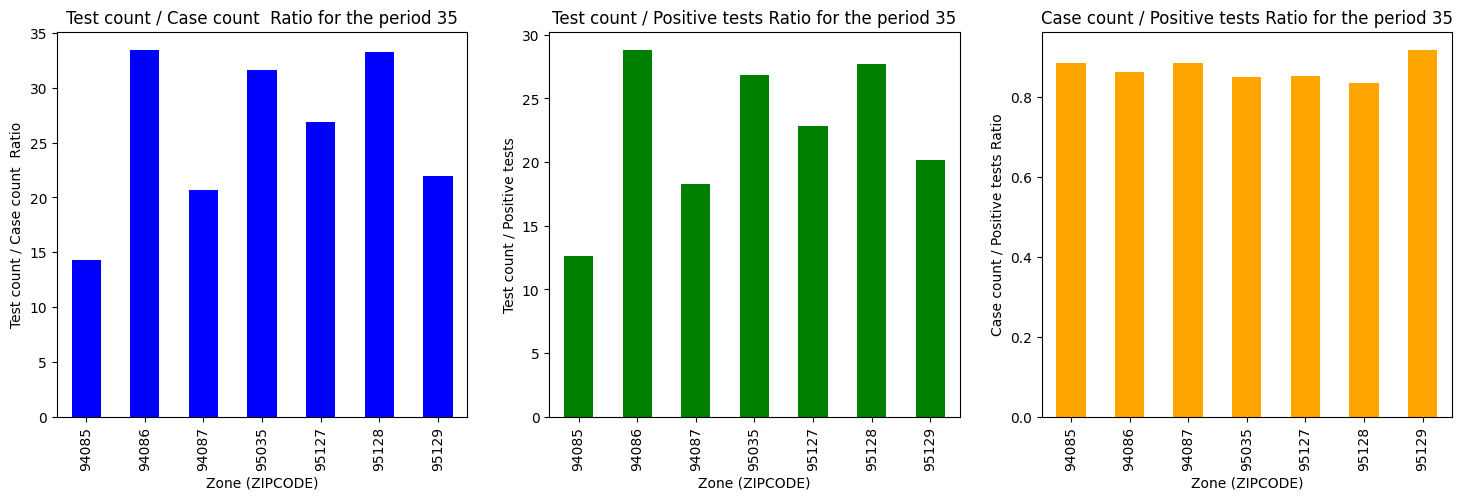

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

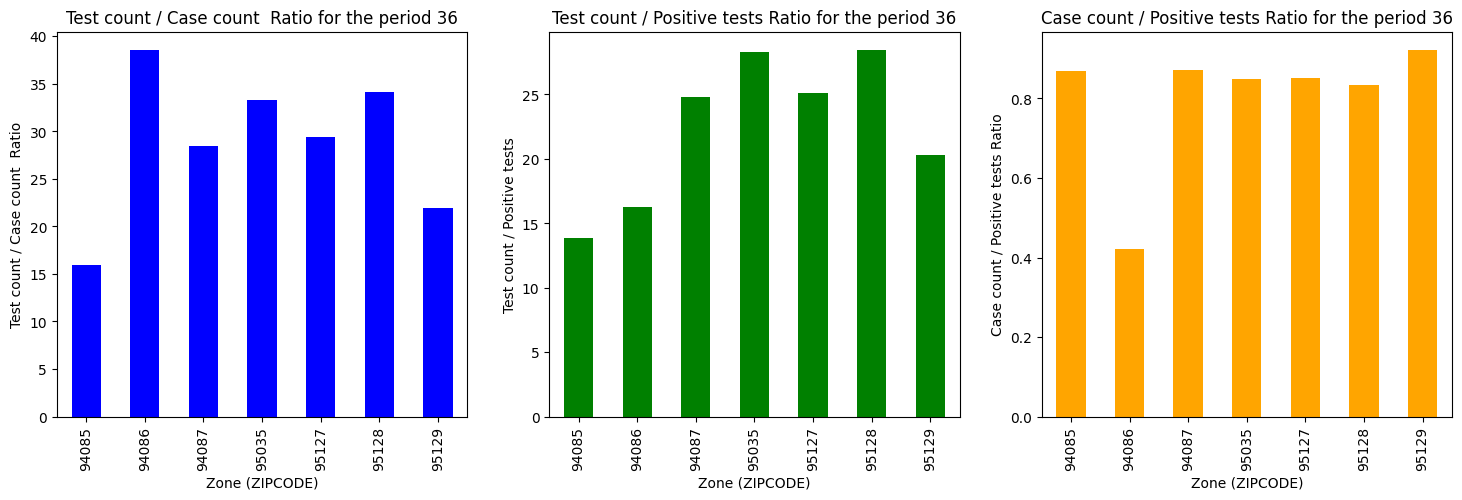

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

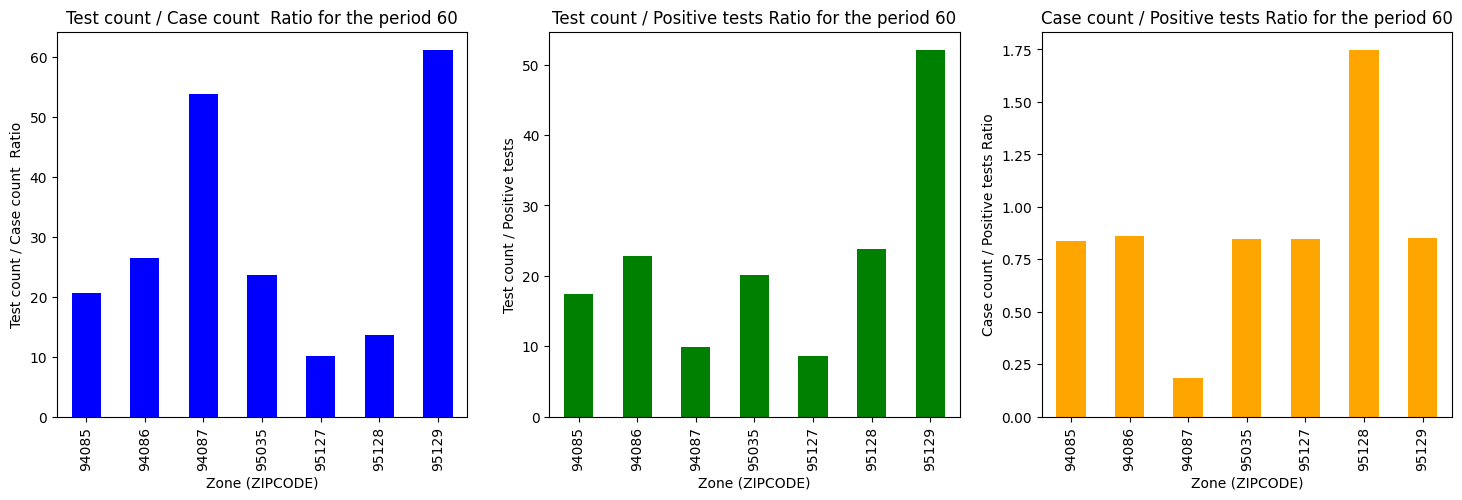

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

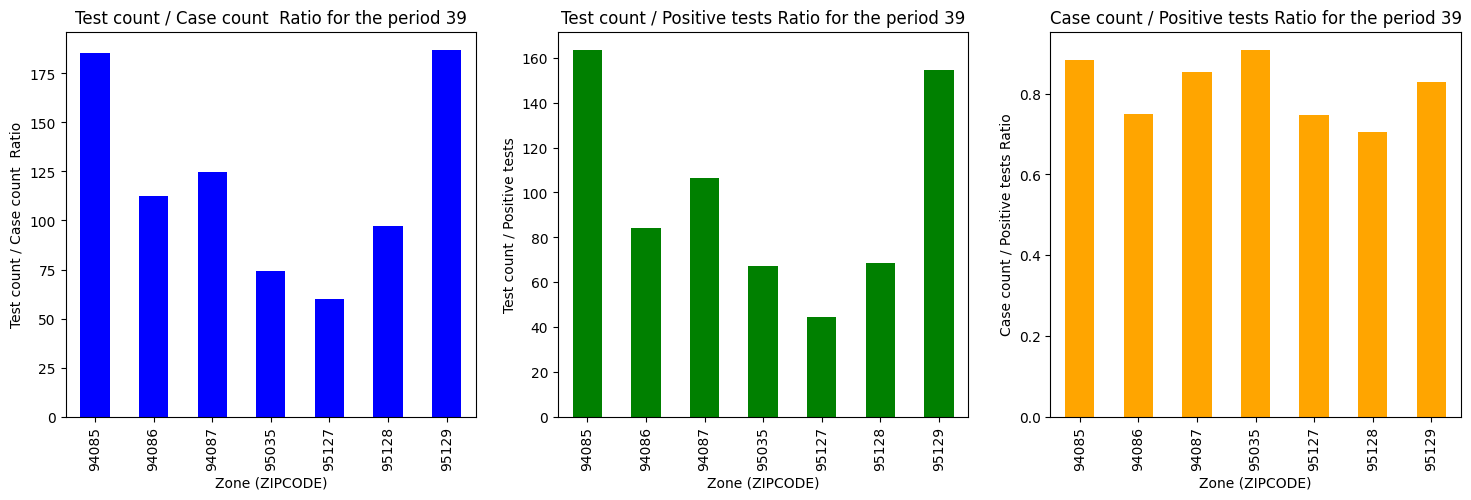

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

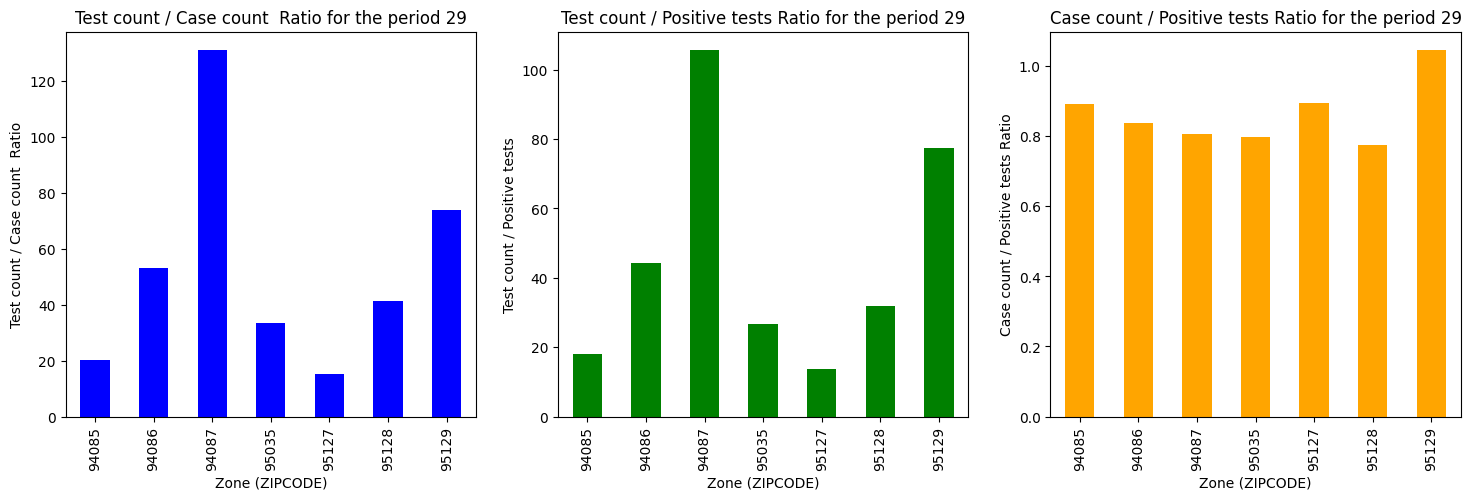

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

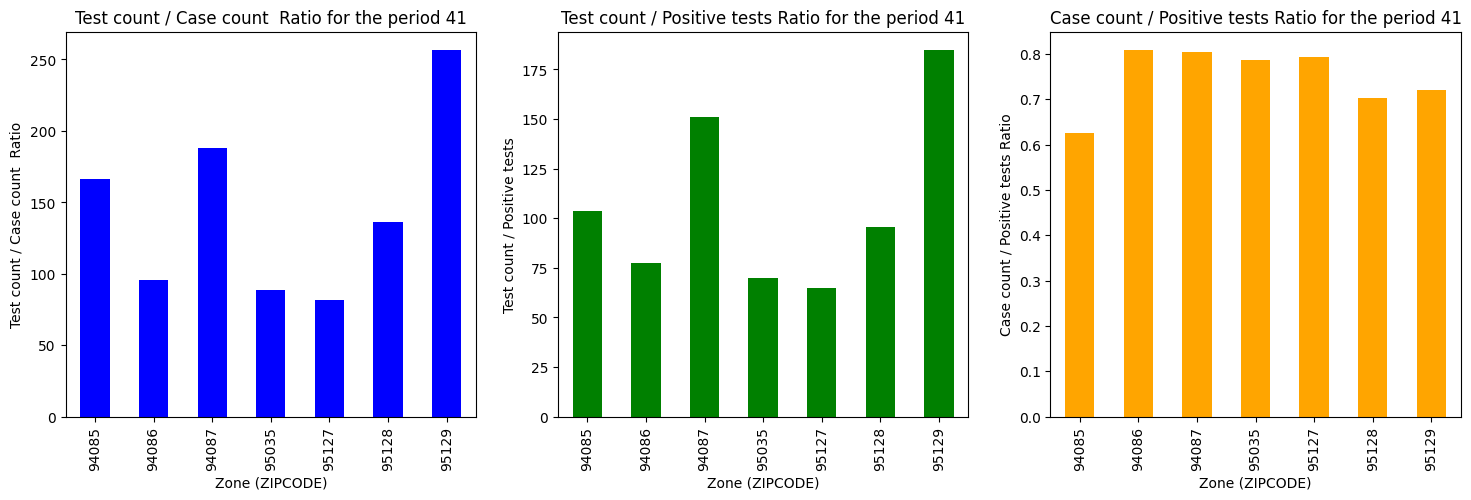

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

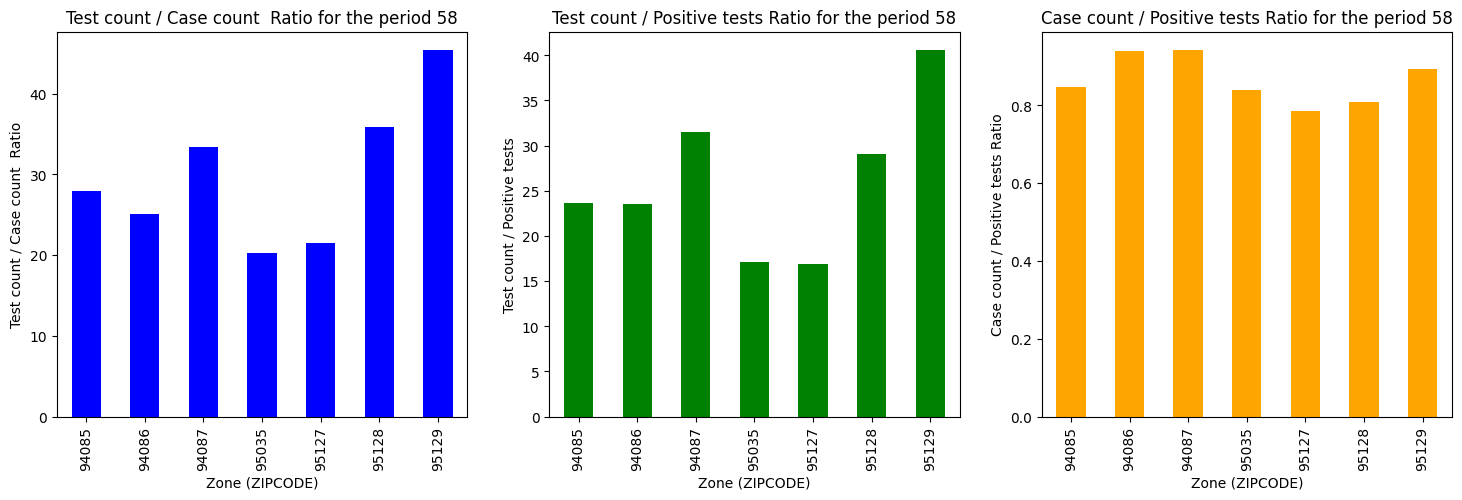

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

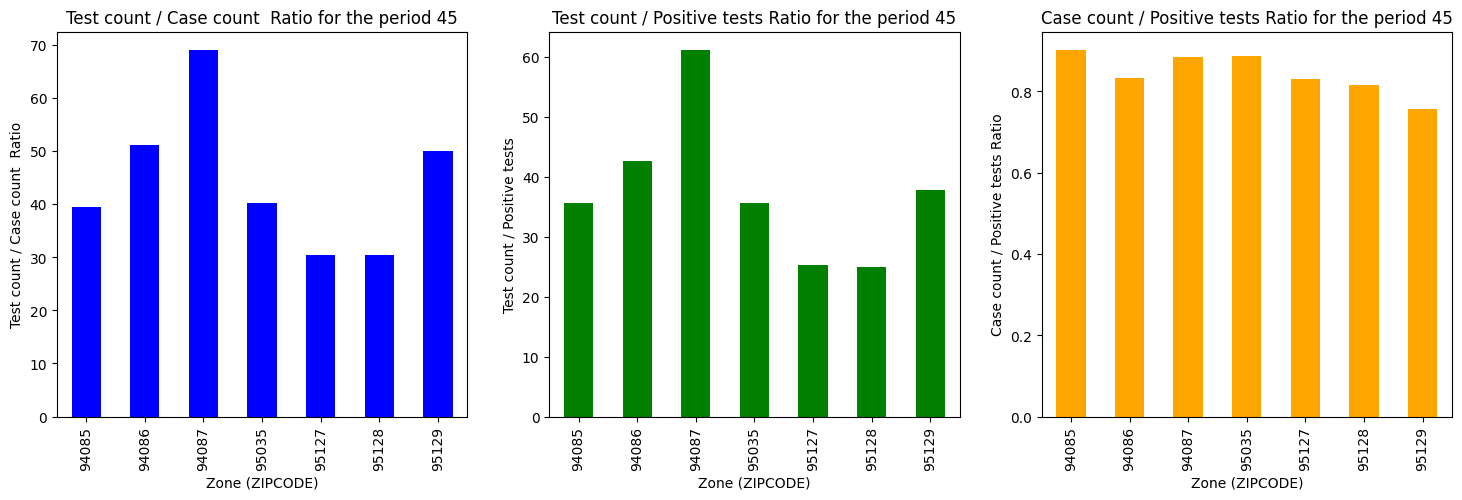

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

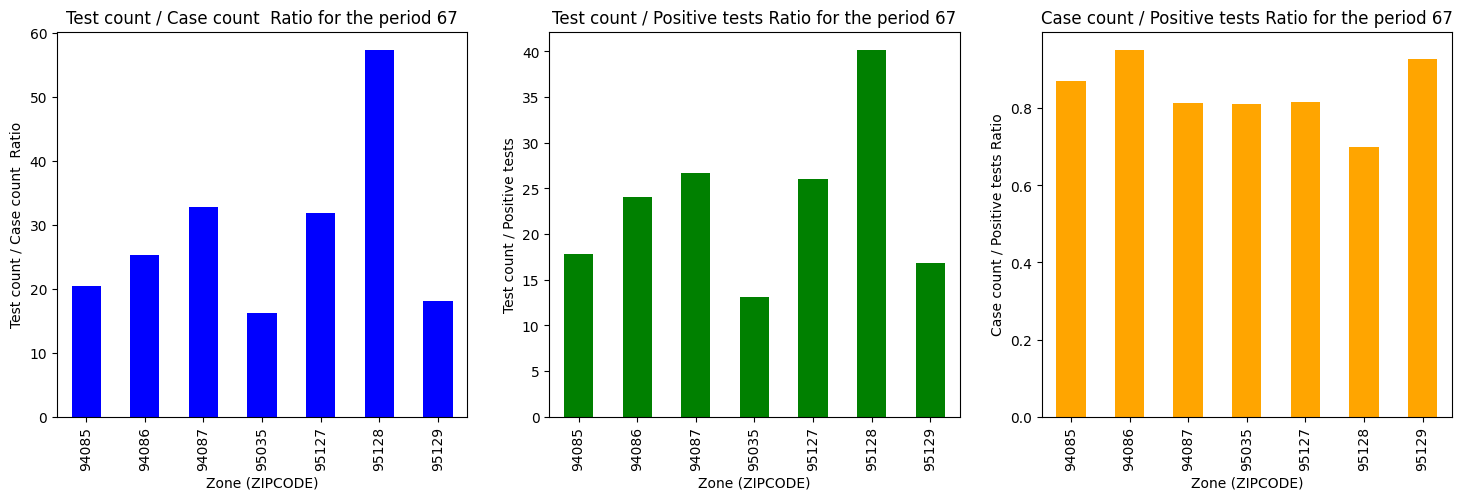

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

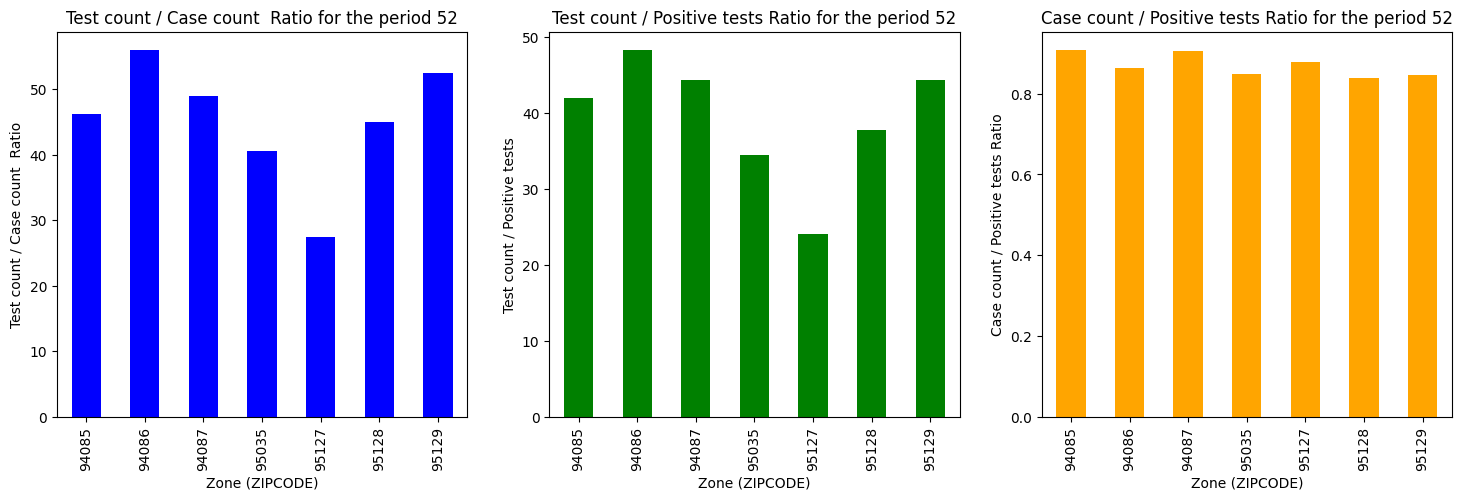

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

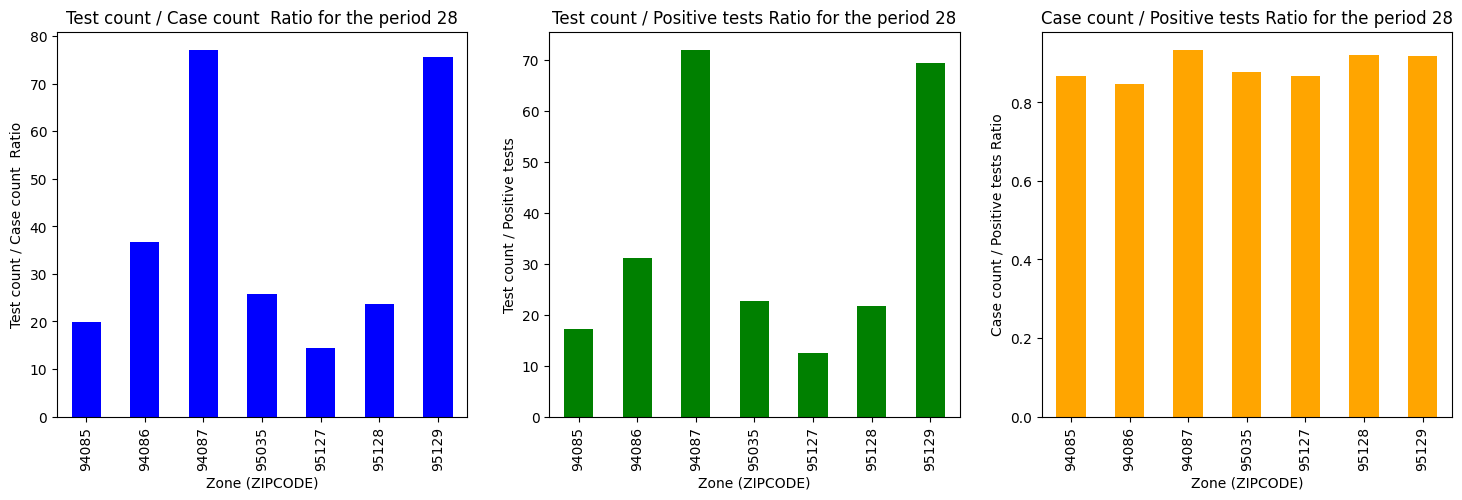

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

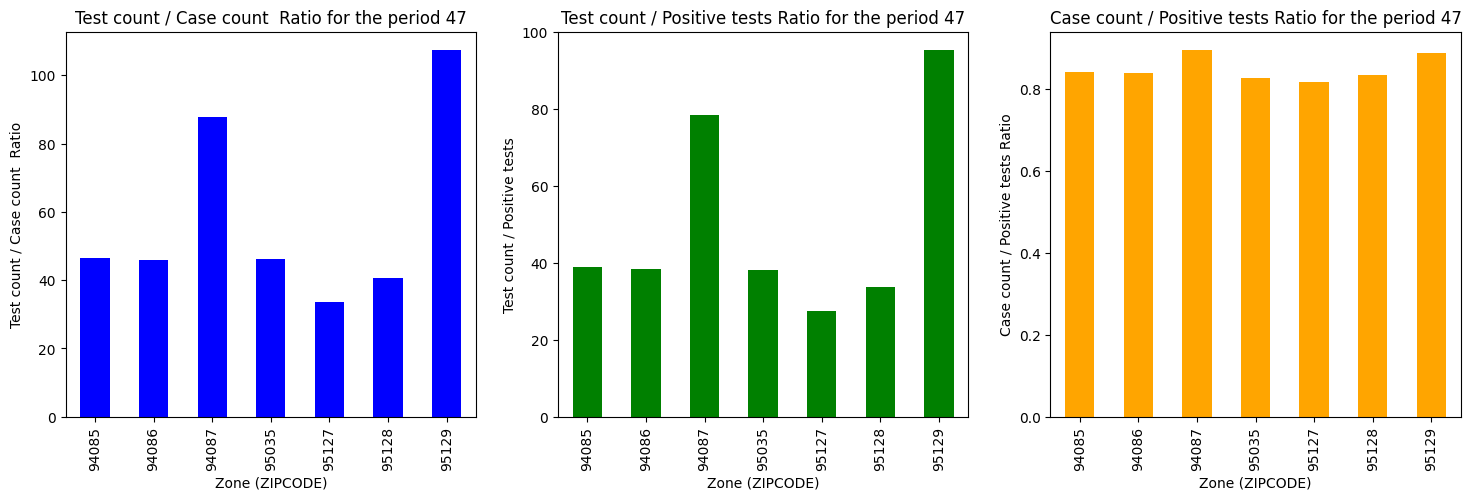

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

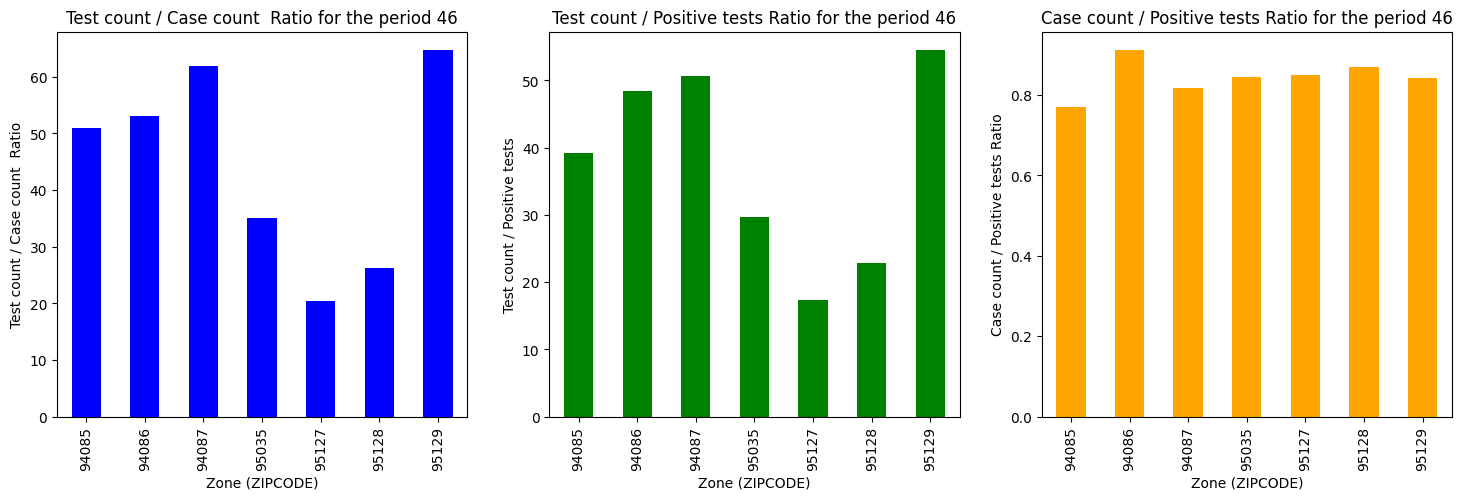

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

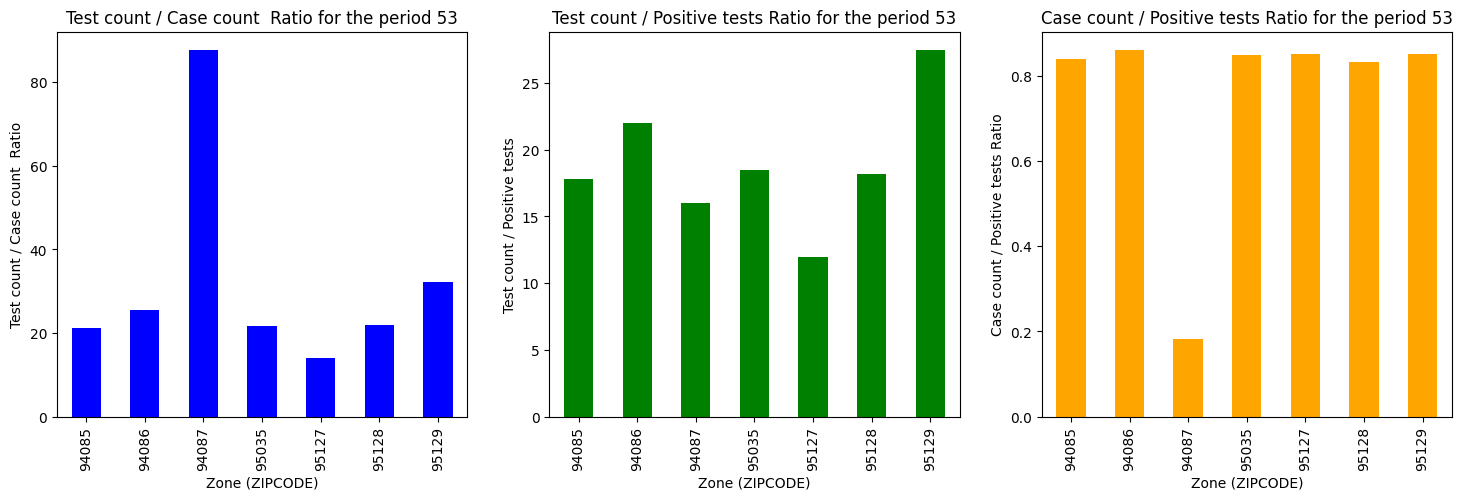

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

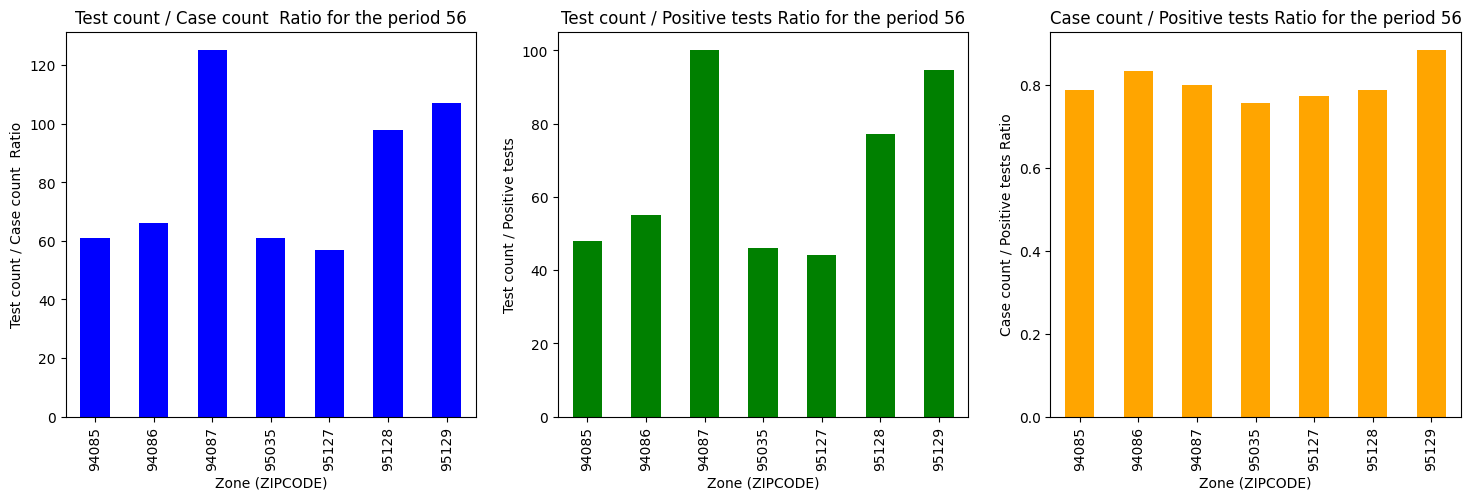

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

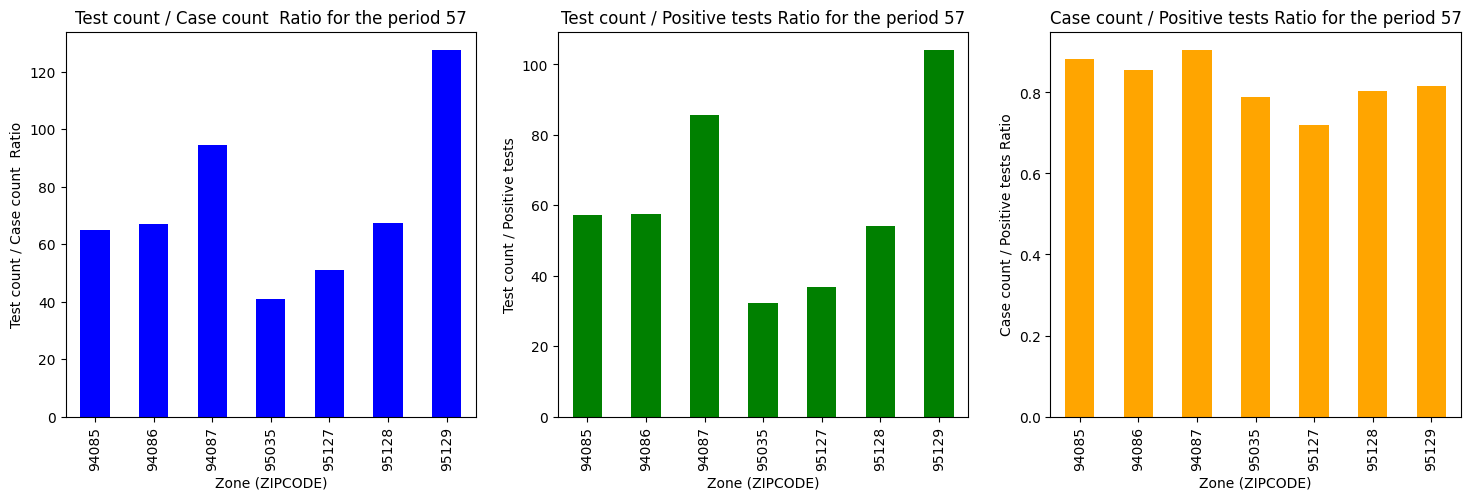

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

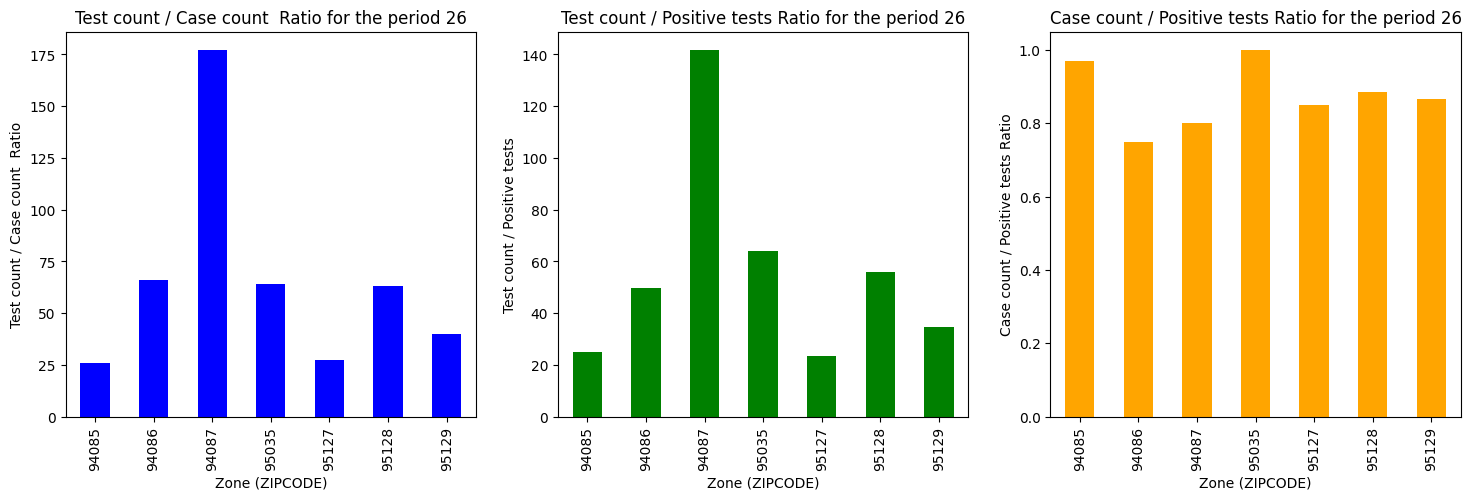

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

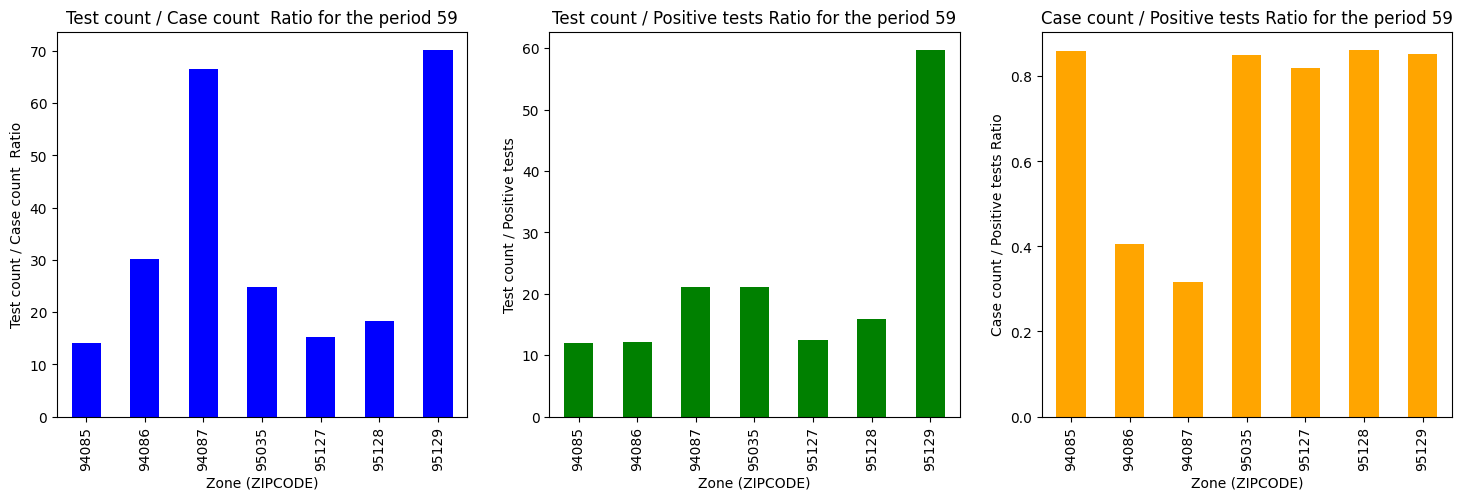

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

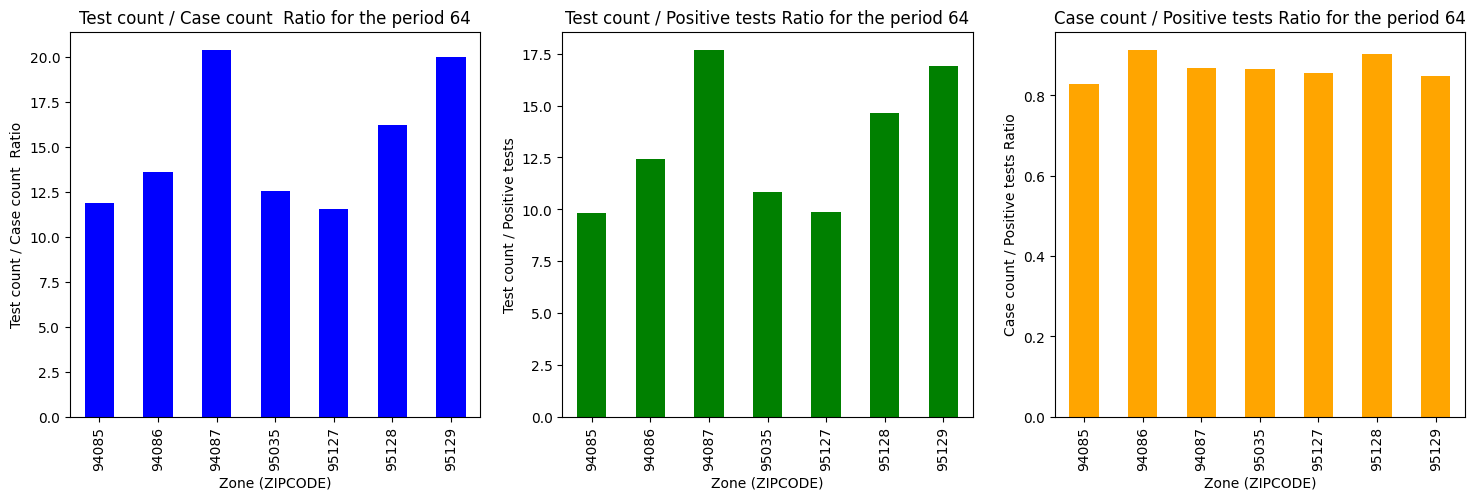

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

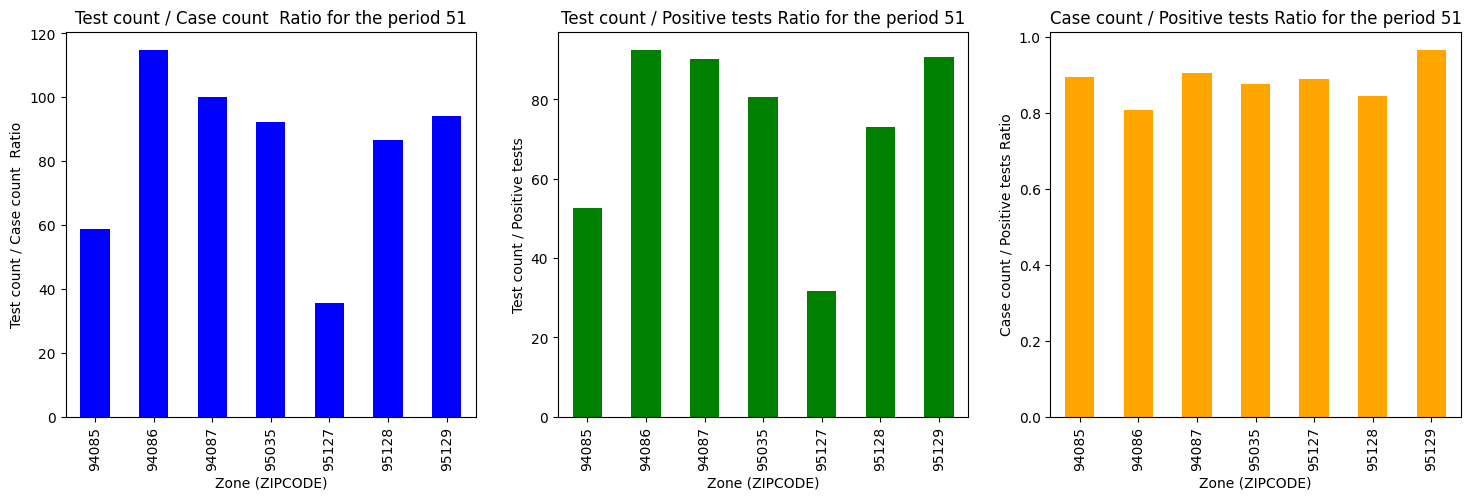

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

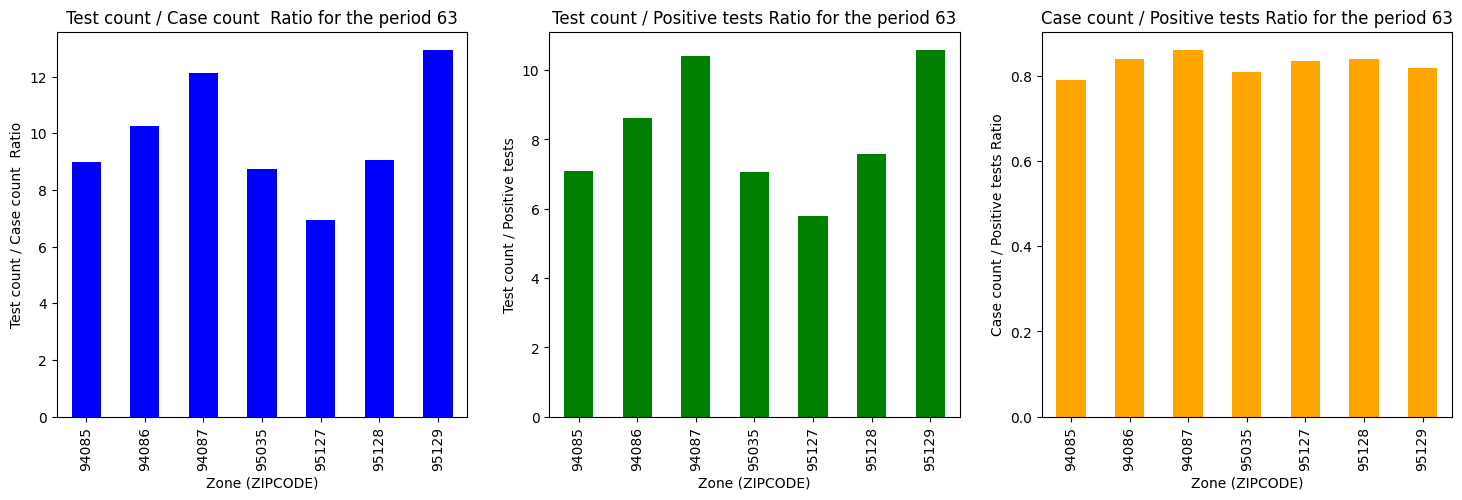

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

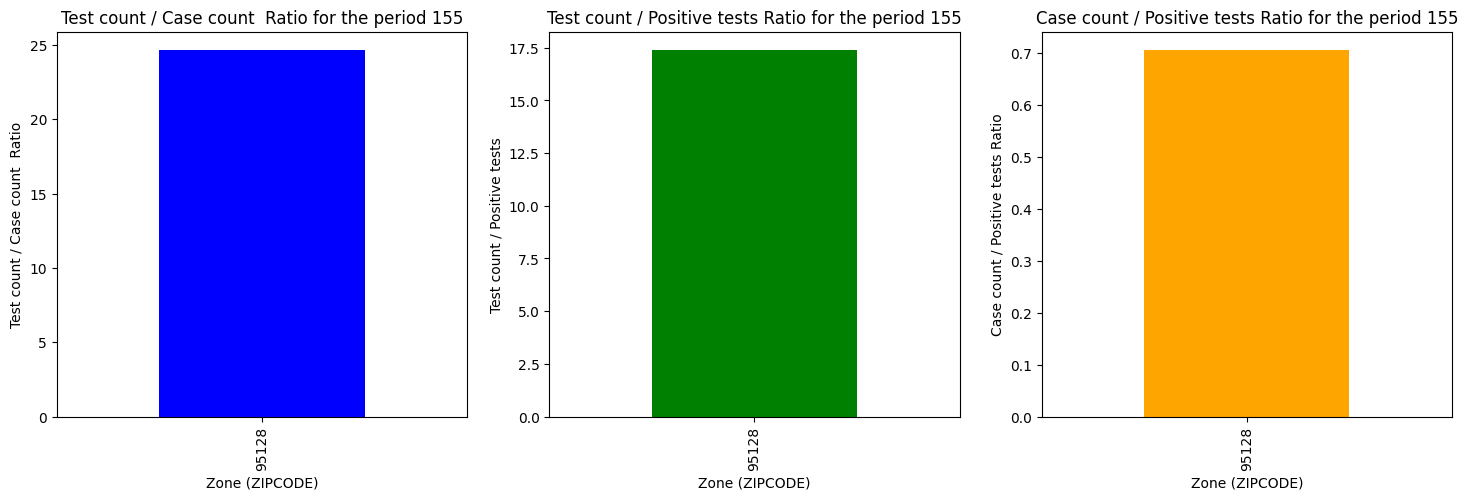

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

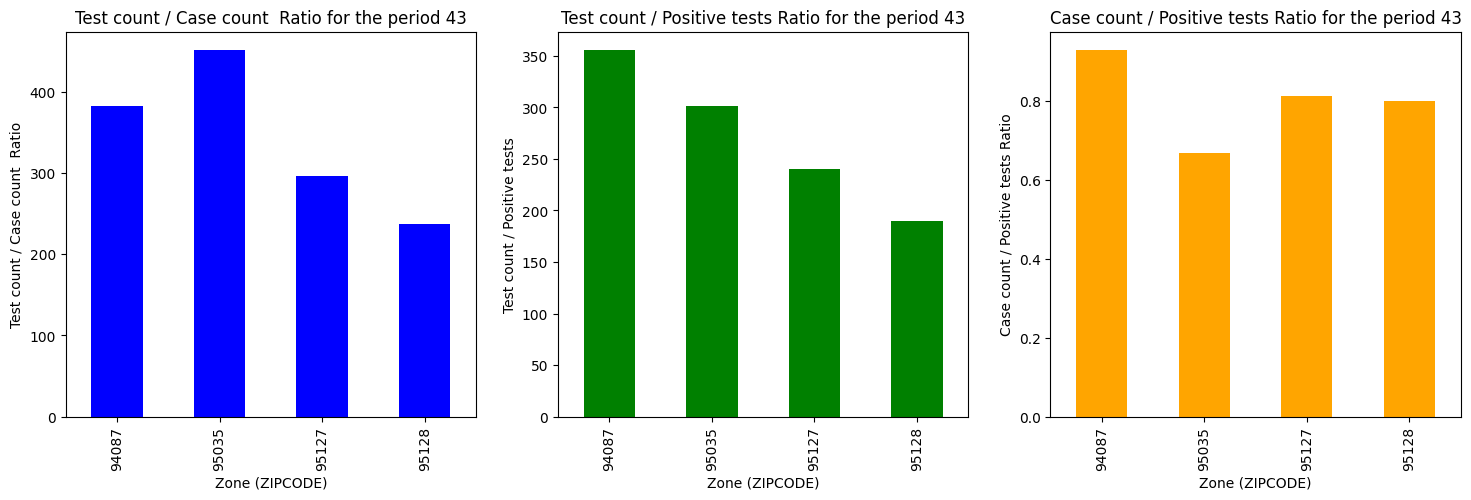

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

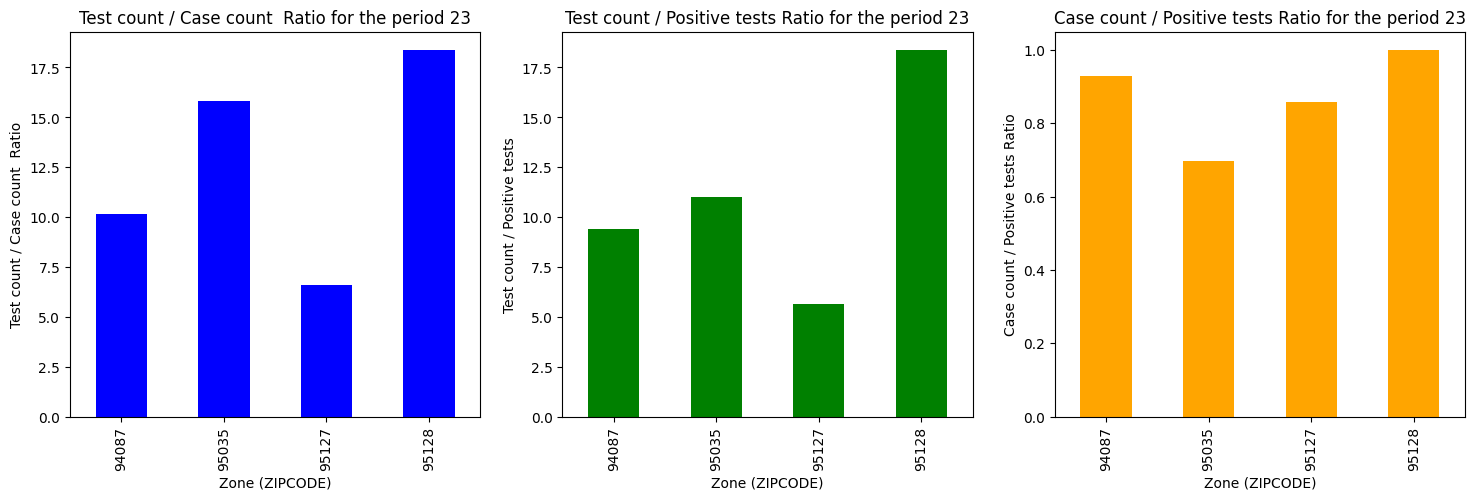

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

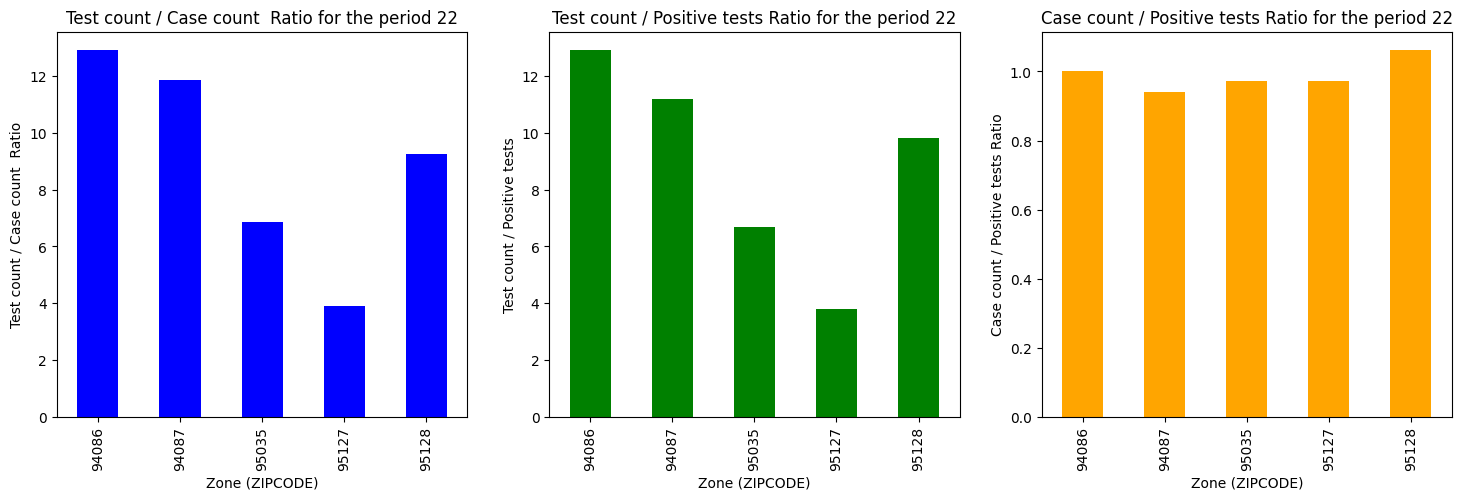

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

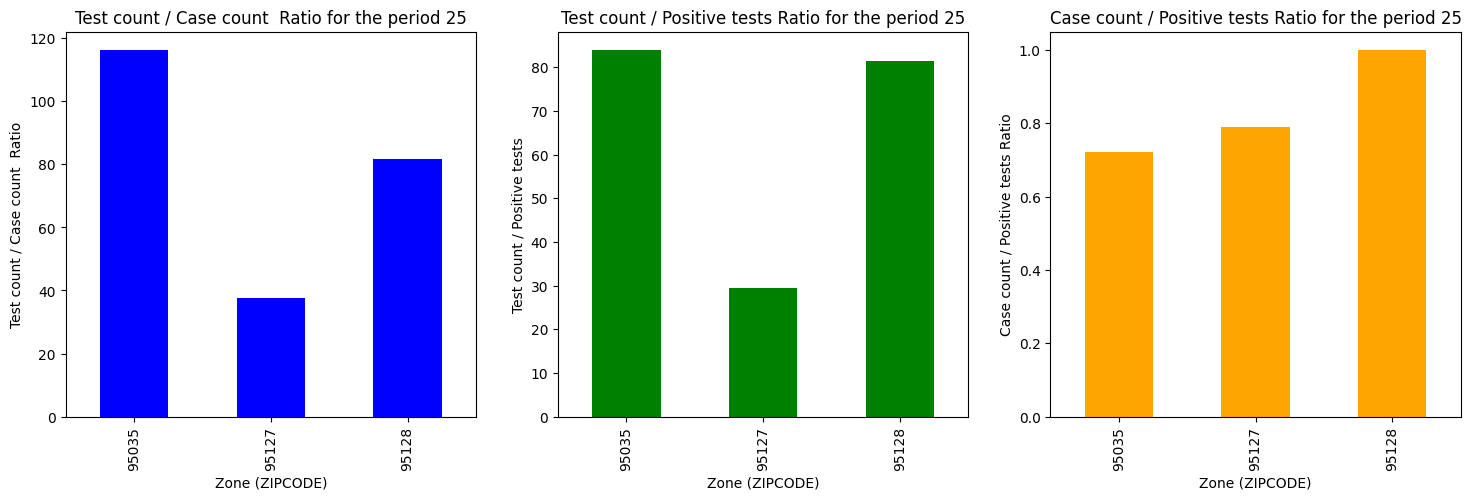

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

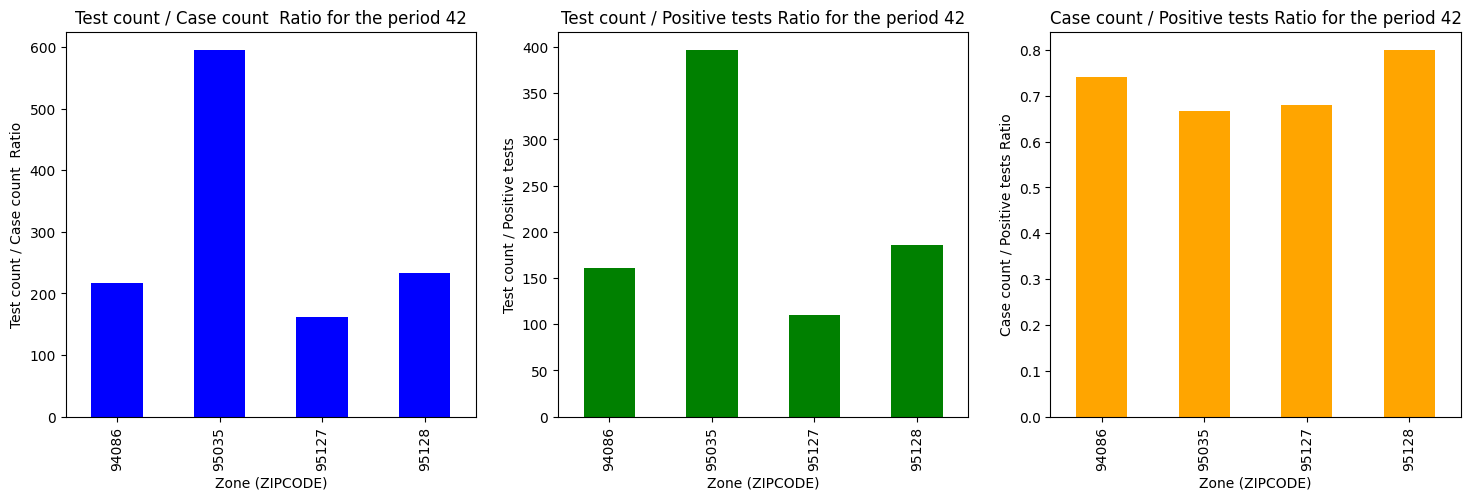

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

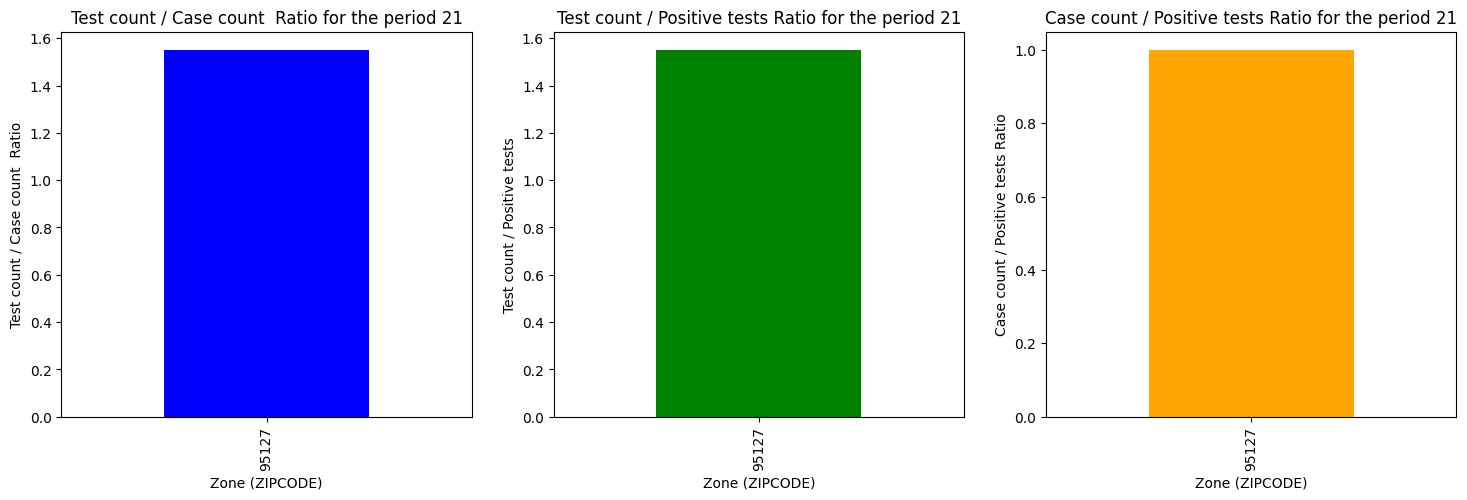

C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
C:\Users\raizer blade\AppData\Local\Temp\ipykernel_17324\2739017608.py:5: Sett

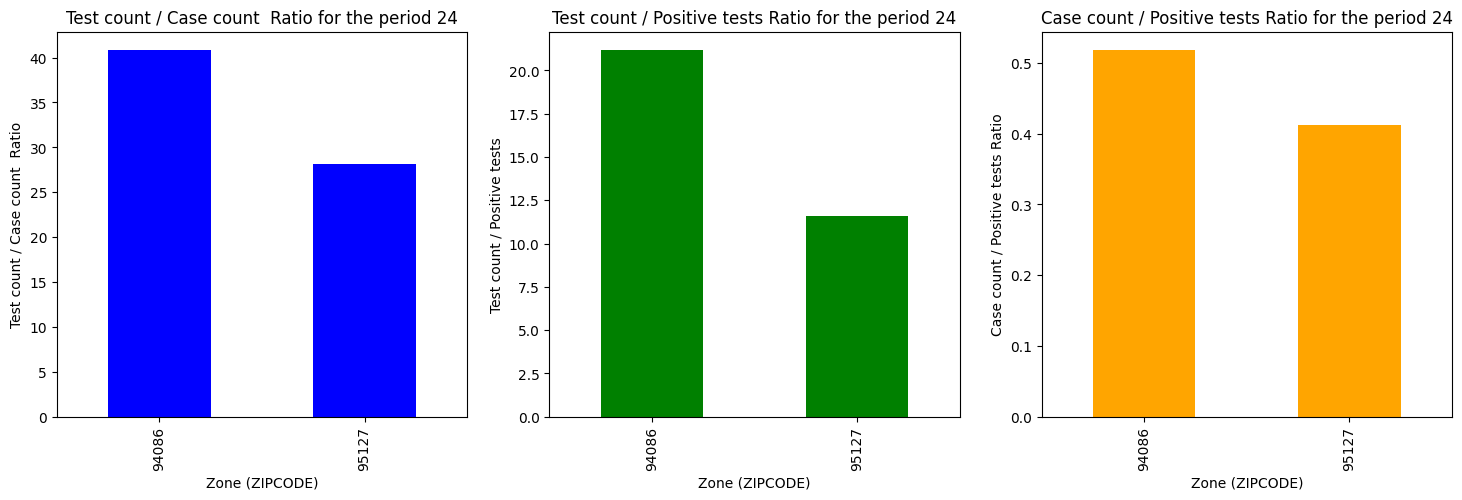

In [27]:
def rapport_cas_test_par_periode(data, periode):
    data_filtered = data[data['time_period'] == periode]
    data_filtered['test_case_ratio'] = data_filtered['test count'] / data_filtered['case count']
    data_filtered['test_positive_ratio'] = data_filtered['test count'] / data_filtered['positive tests']
    data_filtered['case_positive_ratio'] = data_filtered['case count'] / data_filtered['positive tests']
    
    grouped_data = data_filtered.groupby(['zcta'])[['test_case_ratio', 'test_positive_ratio', 'case_positive_ratio']].sum()
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
    
    grouped_data['test_case_ratio'].plot(kind='bar', ax=axes[0], color='blue')
    axes[0].set_title('Test count / Case count  Ratio for the period ' + str(periode))
    axes[0].set_xlabel('Zone (ZIPCODE)')
    axes[0].set_ylabel('Test count / Case count  Ratio')
    
    grouped_data['test_positive_ratio'].plot(kind='bar', ax=axes[1], color='green')
    axes[1].set_title('Test count / Positive tests Ratio for the period ' + str(periode))
    axes[1].set_xlabel('Zone (ZIPCODE)')
    axes[1].set_ylabel('Test count / Positive tests')
    
    grouped_data['case_positive_ratio'].plot(kind='bar', ax=axes[2], color='orange')
    axes[2].set_title('Case count / Positive tests Ratio for the period ' + str(periode))
    axes[2].set_xlabel('Zone (ZIPCODE)')
    axes[2].set_ylabel('Case count / Positive tests Ratio')

    plt.show()
periodes = data2['time_period'].unique()
for periode in periodes:
    rapport_cas_test_par_periode(data2,periode)